<a href="https://colab.research.google.com/github/shreethaar/The-Magic-of-the-Sorting-Hat/blob/master/knn_hogwarts_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/A232/Data\ Analytics/project

/content/drive/MyDrive/A232/Data Analytics/project


In [3]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install scikit-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [5]:
df=pd.read_excel('hogwarts_dataset.xlsx',sheet_name='Form Responses 1')
df.to_csv('hogwarts_dataset.csv',index=False)

In [6]:
df=pd.read_csv('hogwarts_dataset.csv')
df.head()

Timestamp "From whom did you receive this Google Form?"   \
0  2024-07-02 19:12:43.621                                           Amsa   
1  2024-07-07 22:49:28.169                                      ain najwa   
2  2024-06-27 00:01:31.256                                         Farhan   
3  2024-07-01 22:28:25.901                                         Farhan   
4  2024-07-08 20:32:55.344                                             JS   

  Personality Traits Behavioural Traits           Hobbies   GPA      Hometown  \
0        Neuroticism       Independence          Cerebral  3.72         Perak   
1      Agreeableness      Collaboration          Physical  3.60         Perak   
2      Agreeableness       Independence  Making-Tinkering  3.41         Johor   
3      Agreeableness       Independence  Making-Tinkering  3.41         Johor   
4       Extraversion        Risk-Taking          Physical  3.44  Pulau Pinang   

            Inasis Co-curriculum Activities Leadership Experience  \
0       Inasis MAS                      NaN                   Yes   
1  Inasis SME BANK                TAEKWONDO                    No   
2    Inasis PROTON              ISLAMIC ART                   Yes   
3    Inasis PROTON              ISLAMIC ART                   Yes   
4       Inasis YAB                 PALAPES                    Yes   

  Favourite Cuisine  Estimated Household Income  Number of Best Friends  \
0           Western                      5000.0                     0.0   
1             Malay                      5000.0                     1.0   
2             Malay                     20000.0                     2.0   
3             Malay                     20000.0                     2.0   
4           Chinese                      4800.0                     2.0   

  Faculty Hogwarts House  
0     SQS     Gryffindor  
1     IBS     Gryffindor  
2     SOC     Gryffindor  
3     SOC     Gryffindor  
4     SQS     Gryffindor

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Timestamp                                       150 non-null    object 
 1   "From whom did you receive this Google Form?"   150 non-null    object 
 2   Personality Traits                              150 non-null    object 
 3   Behavioural Traits                              150 non-null    object 
 4   Hobbies                                         150 non-null    object 
 5   GPA                                             150 non-null    float64
 6   Hometown                                        150 non-null    object 
 7   Inasis                                          150 non-null    object 
 8   Co-curriculum Activities                        134 non-null    object 
 9   Leadership Experience                      

In [8]:
df=df.drop(df.columns[[0,1]],axis=1)

In [9]:
df.isnull().sum()

Personality Traits             0
Behavioural Traits             0
Hobbies                        0
GPA                            0
Hometown                       0
Inasis                         0
Co-curriculum Activities      16
Leadership Experience          0
Favourite Cuisine              0
Estimated Household Income     2
Number of Best Friends         1
Faculty                        0
Hogwarts House                 0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

Personality Traits             0.000000
Behavioural Traits             0.000000
Hobbies                        0.000000
GPA                            0.000000
Hometown                       0.000000
Inasis                         0.000000
Co-curriculum Activities      10.666667
Leadership Experience          0.000000
Favourite Cuisine              0.000000
Estimated Household Income     1.333333
Number of Best Friends         0.666667
Faculty                        0.000000
Hogwarts House                 0.000000
dtype: float64

In [11]:
df['Co-curriculum Activities'].fillna('TAEKWONDO',inplace=True)
df['Estimated Household Income'].fillna(df['Estimated Household Income'].mean(),inplace=True)
df['Number of Best Friends'].replace(np.nan,df['Number of Best Friends'].mean(),inplace=True)

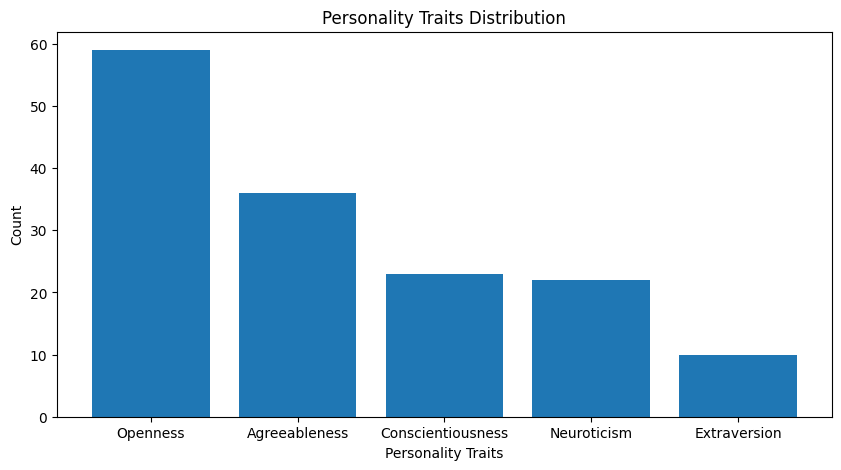

In [12]:
#Personality Traits Distribution
personality=df['Personality Traits'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(personality.index,personality.values)
plt.title('Personality Traits Distribution')
plt.xlabel('Personality Traits')
plt.ylabel('Count')
plt.show()

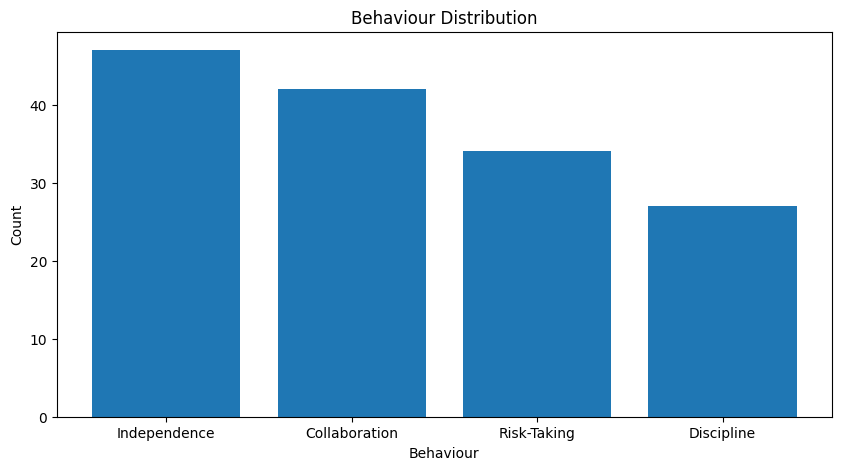

In [13]:
# Behavioural Traits Distribution
behaviour=df['Behavioural Traits'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(behaviour.index,behaviour.values)
plt.title('Behaviour Distribution')
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.show()

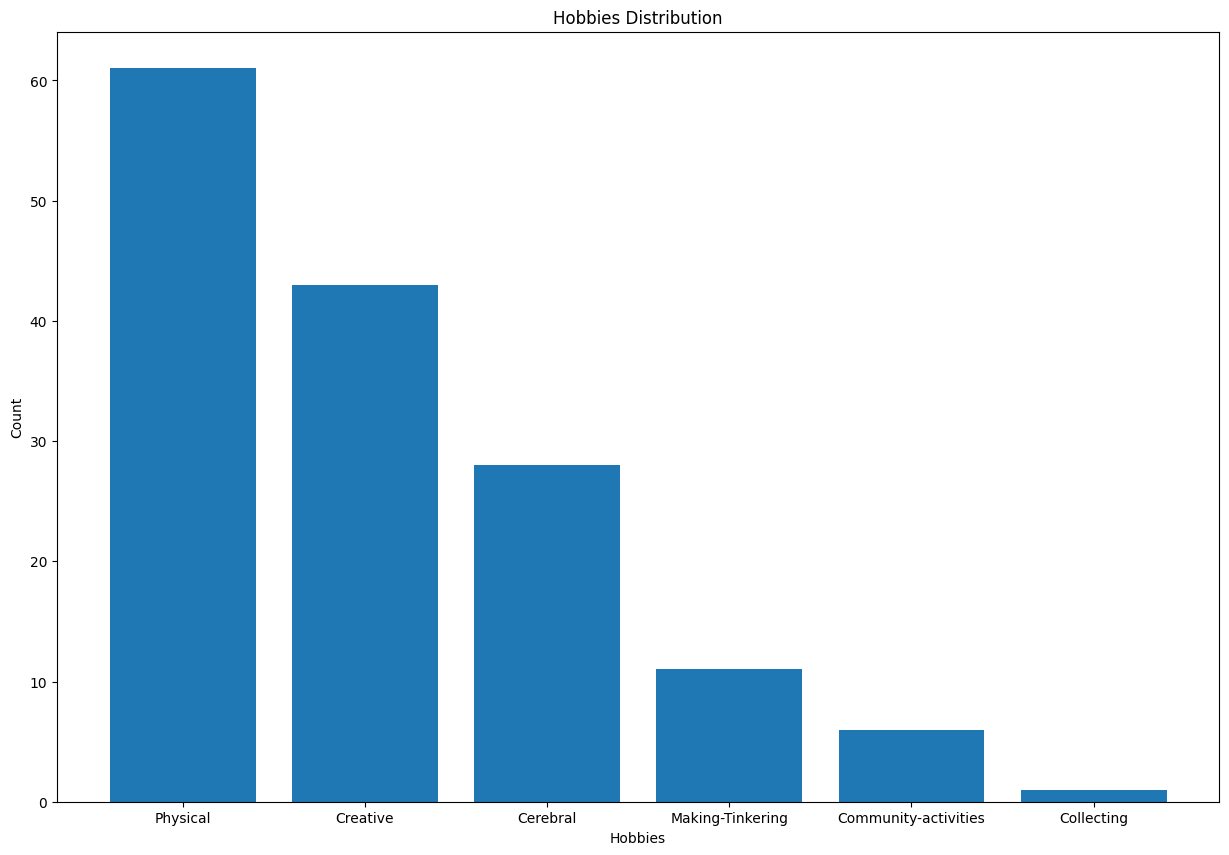

In [14]:
# Hobbies Distribution
hobbies=df['Hobbies'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(hobbies.index,hobbies.values)
plt.title('Hobbies Distribution')
plt.xlabel('Hobbies')
plt.ylabel('Count')
plt.show()

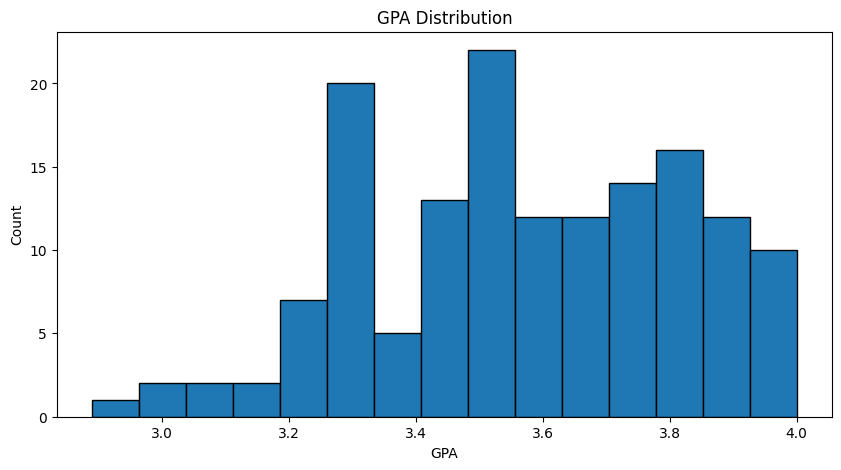

In [15]:
# GPA distribution
gpa=df['GPA'].value_counts()
plt.figure(figsize=(10, 5))
plt.hist(df['GPA'], bins=15, edgecolor='black')  # Adjust bins as needed
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Count')
plt.show()

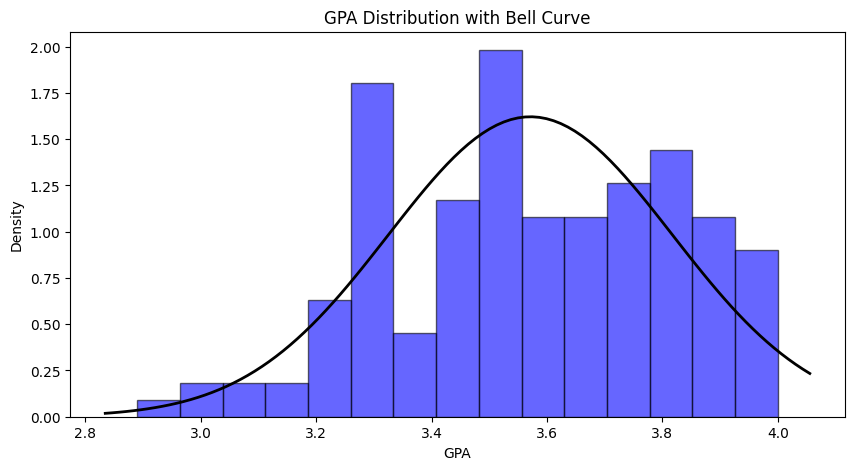

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Example dataframe
# df = pd.DataFrame({'GPA': [your GPA data here]})

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(df['GPA'], bins=15, edgecolor='black', density=True, alpha=0.6, color='b')

# Fit a normal distribution to the data
mean, std_dev = norm.fit(df['GPA'])

# Plot the bell curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

# Titles and labels
plt.title('GPA Distribution with Bell Curve')
plt.xlabel('GPA')
plt.ylabel('Density')

plt.show()


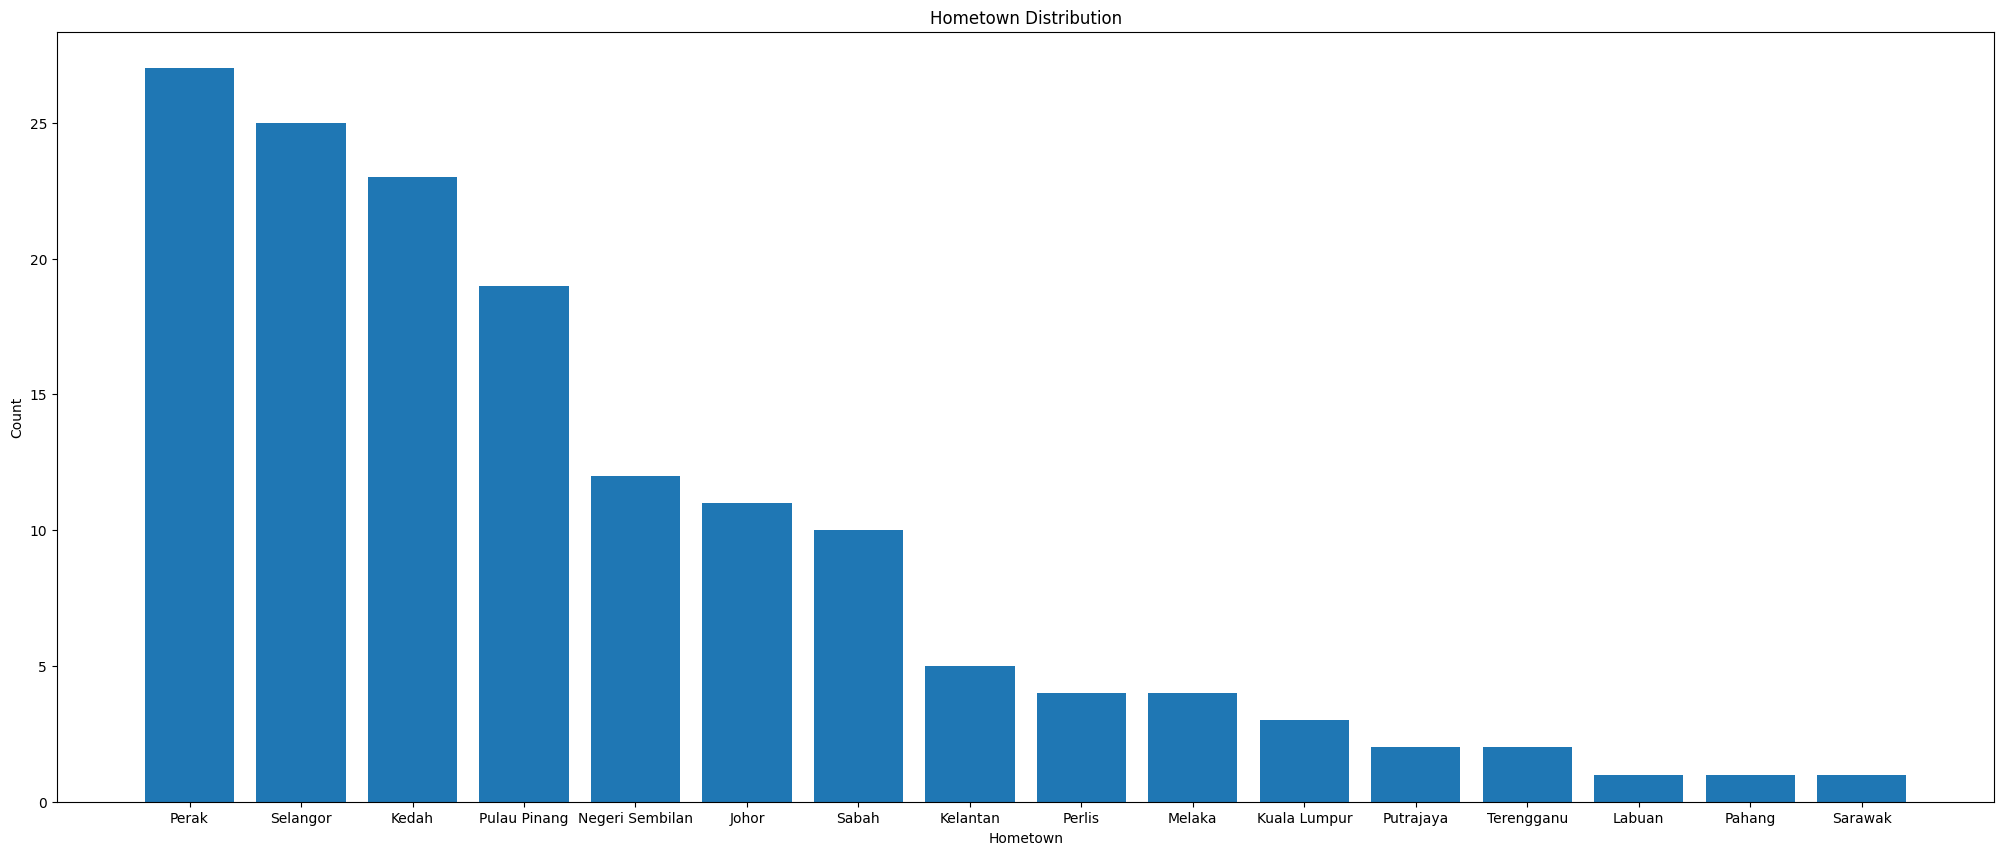

In [17]:
# Hometown
hometown=df['Hometown'].value_counts()
plt.figure(figsize=(25,10))
plt.bar(hometown.index,hometown.values)
plt.title('Hometown Distribution')
plt.xlabel('Hometown')
plt.ylabel('Count')
plt.show()

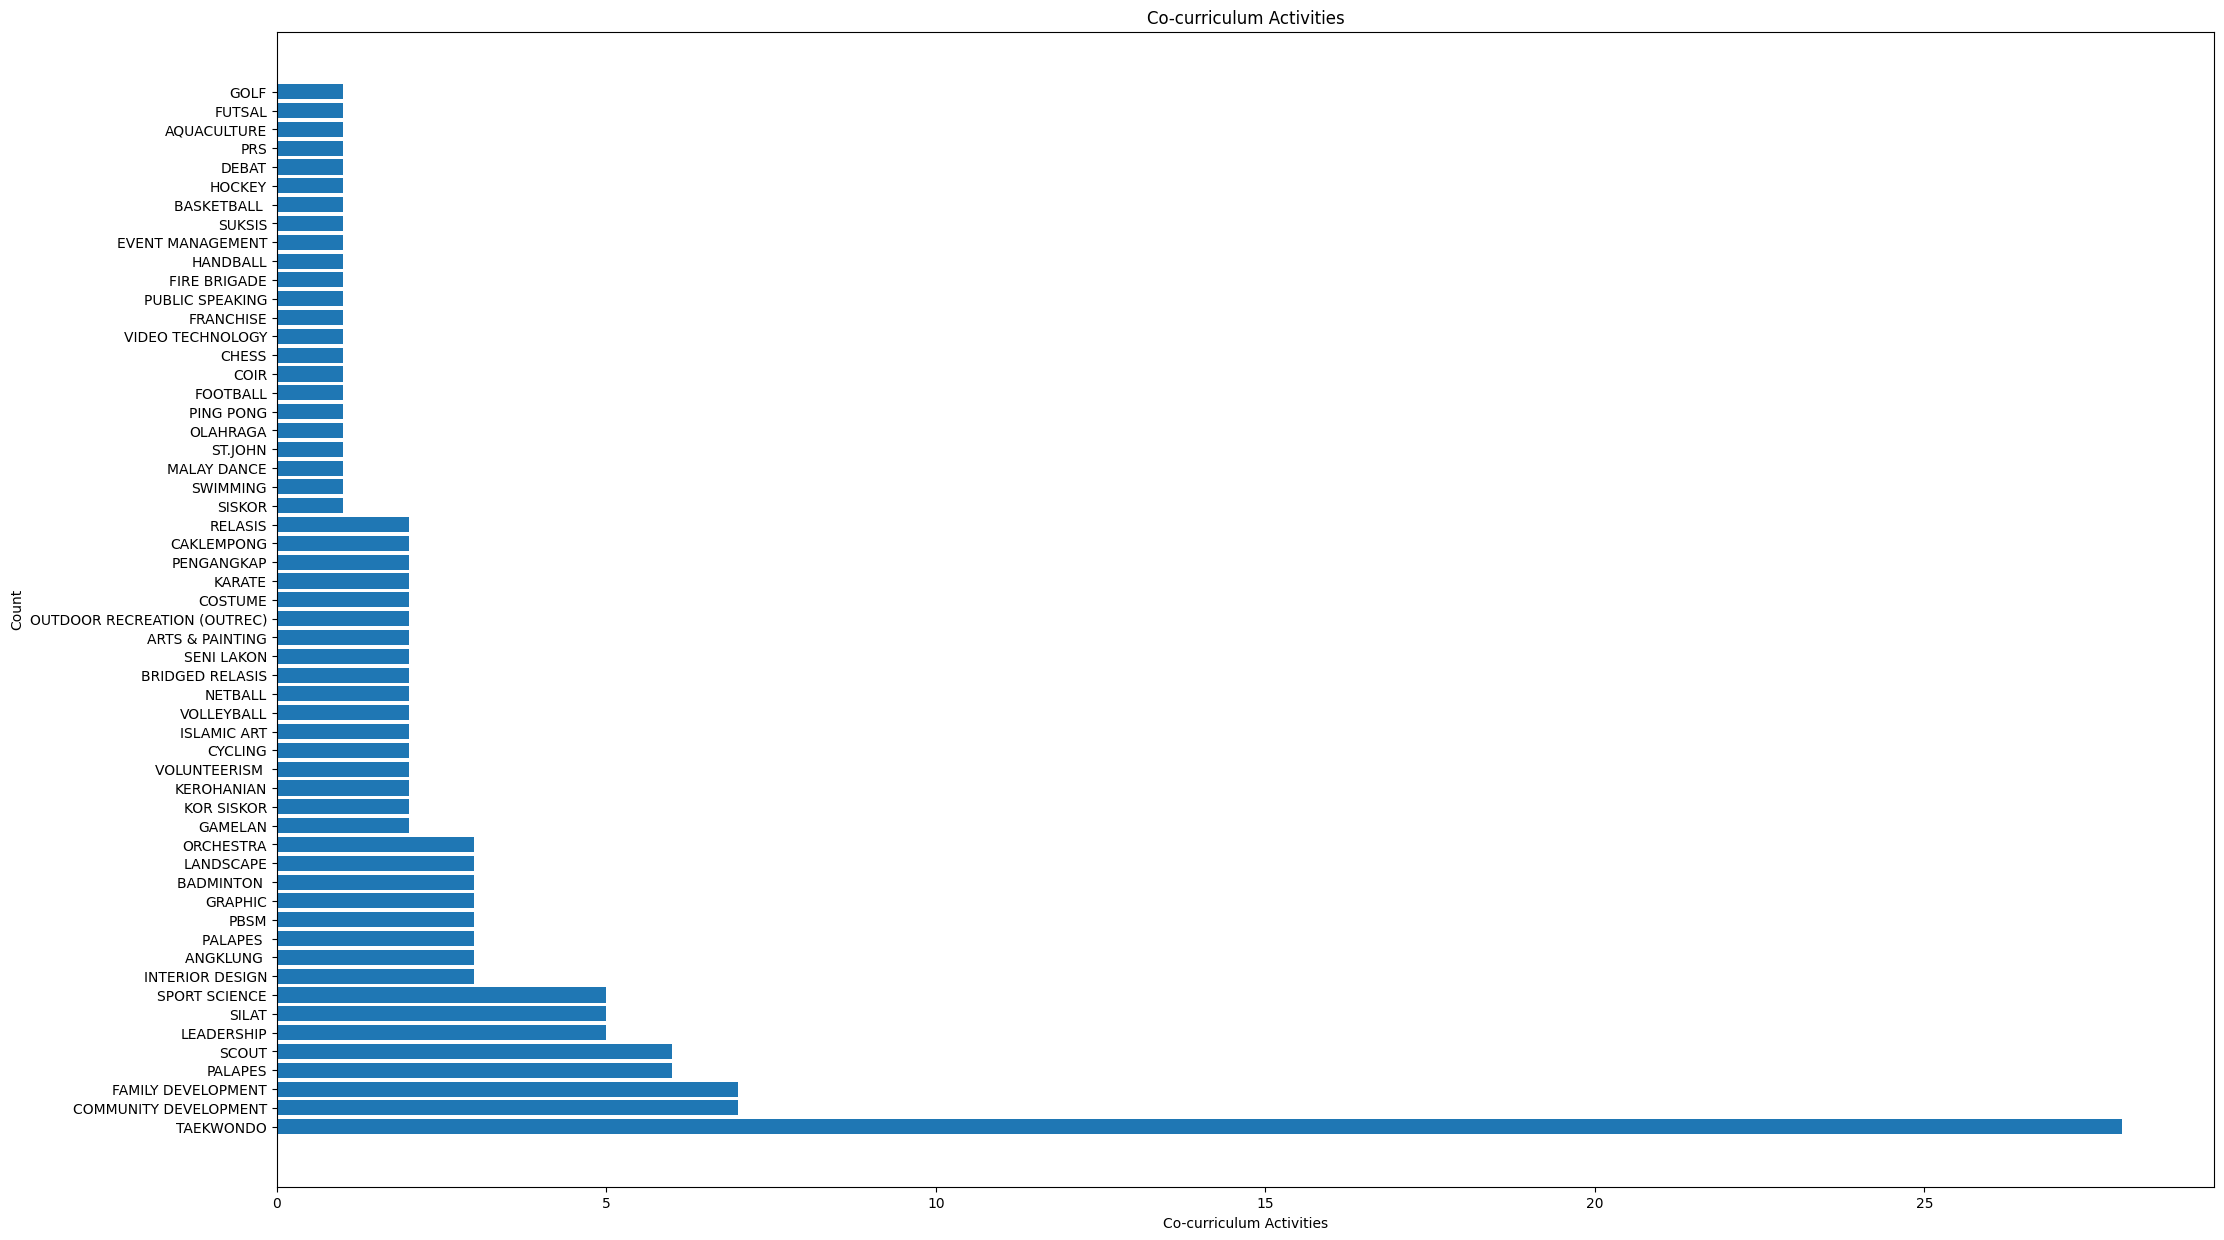

In [18]:
# Co-curriculum distribution
kok=df['Co-curriculum Activities'].value_counts()
plt.figure(figsize=(25,15))
plt.barh(kok.index,kok.values)
plt.title('Co-curriculum Activities')
plt.xlabel('Co-curriculum Activities')
plt.ylabel('Count')
plt.show()

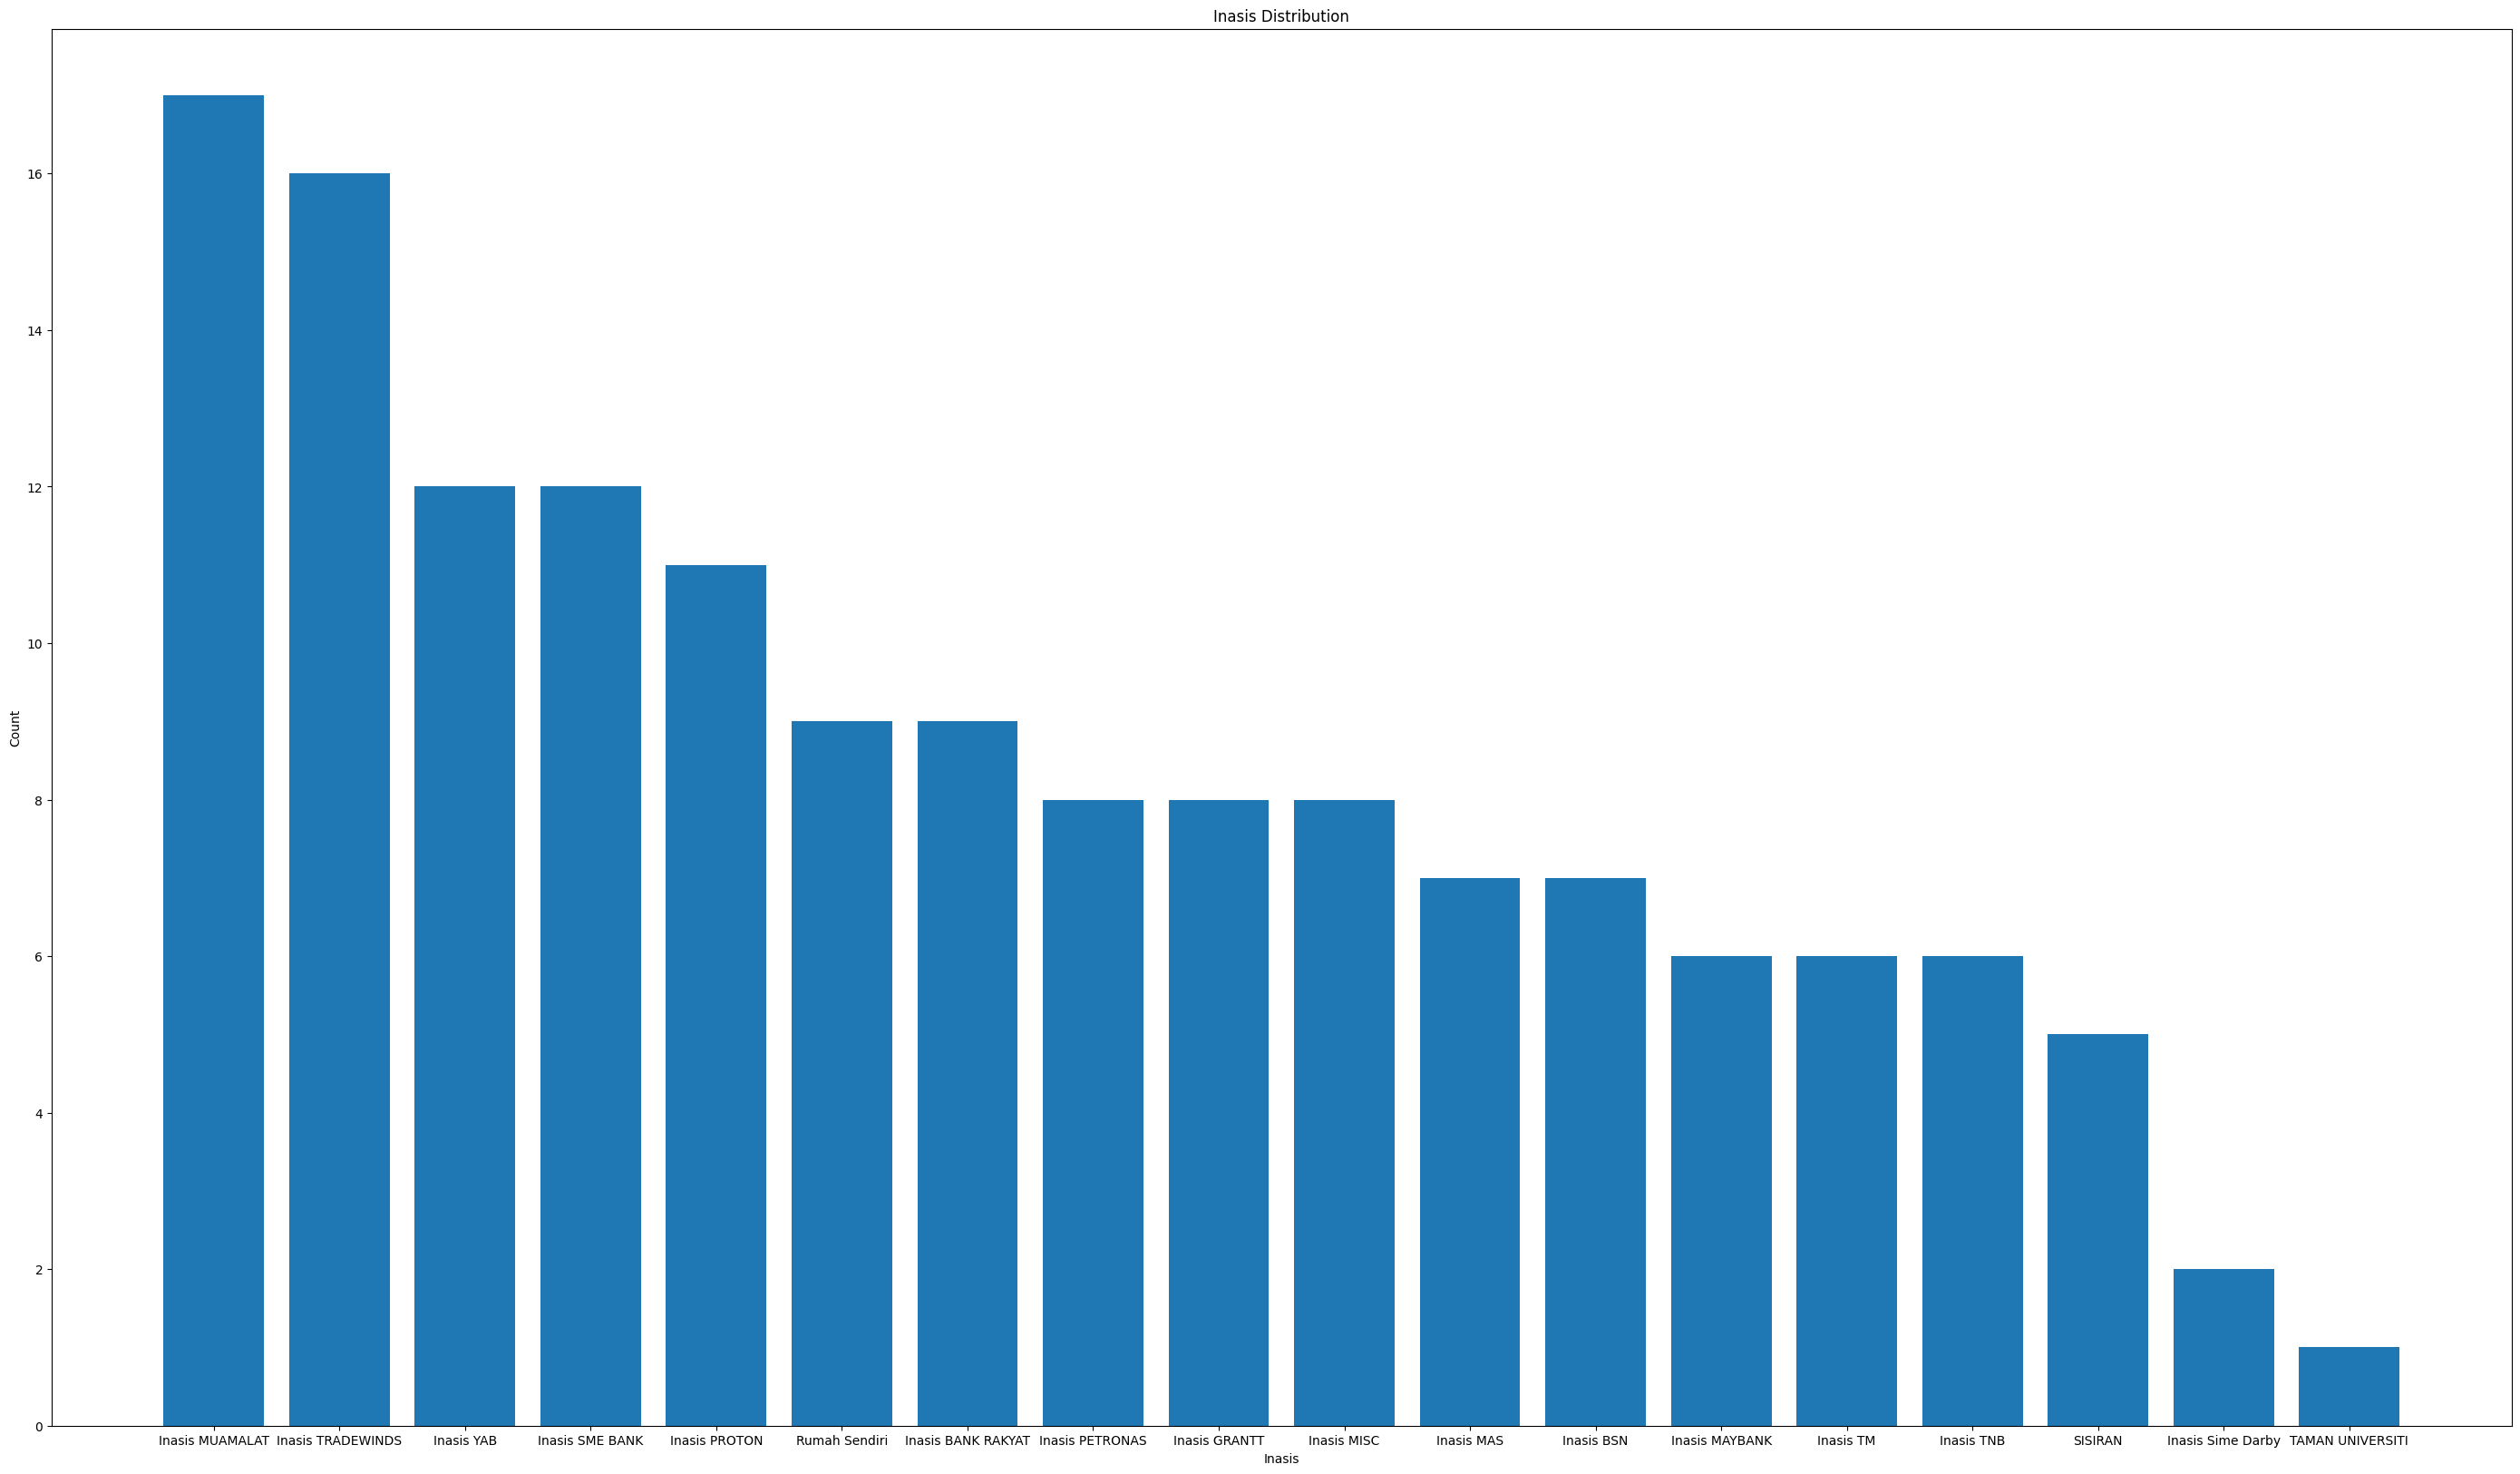

In [19]:
#Inasis Distribution
inasis=df['Inasis'].value_counts()
plt.figure(figsize=(35,20))
plt.bar(inasis.index,inasis.values)
plt.title('Inasis Distribution')
plt.xlabel('Inasis')
plt.ylabel('Count')
plt.show()

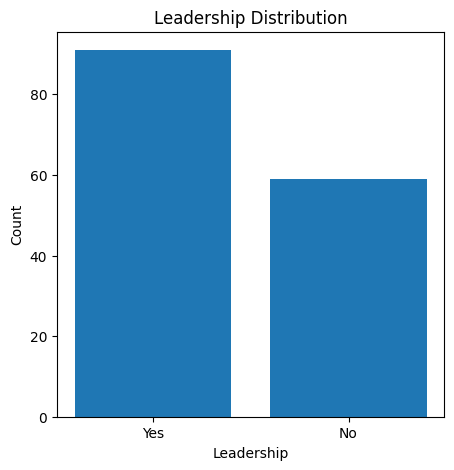

In [20]:
# Leadership Distribution
leadership=df['Leadership Experience'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(leadership.index,leadership.values)
plt.title('Leadership Distribution')
plt.xlabel('Leadership')
plt.ylabel('Count')
plt.show()

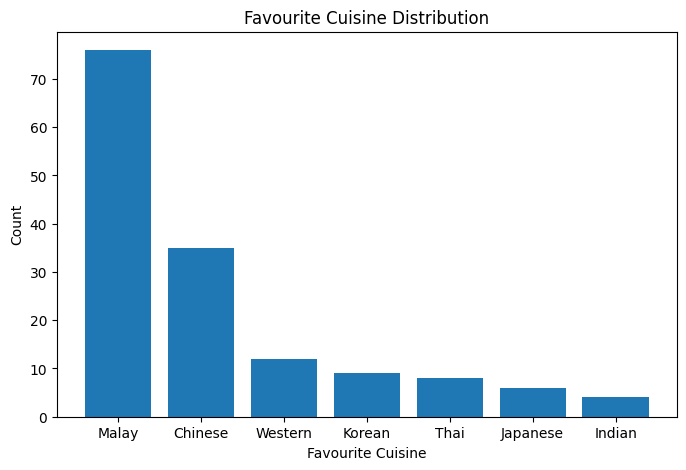

In [21]:
cuisine=df['Favourite Cuisine'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(cuisine.index,cuisine.values)
plt.title('Favourite Cuisine Distribution')
plt.xlabel('Favourite Cuisine')
plt.ylabel('Count')
plt.show()

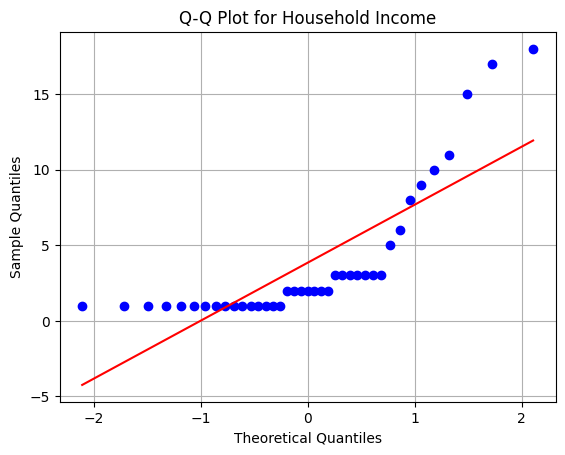

In [22]:
# estimated family income
income=df['Estimated Household Income'].value_counts()
stats.probplot(income, dist="norm", plot=plt)
plt.title('Q-Q Plot for Household Income')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

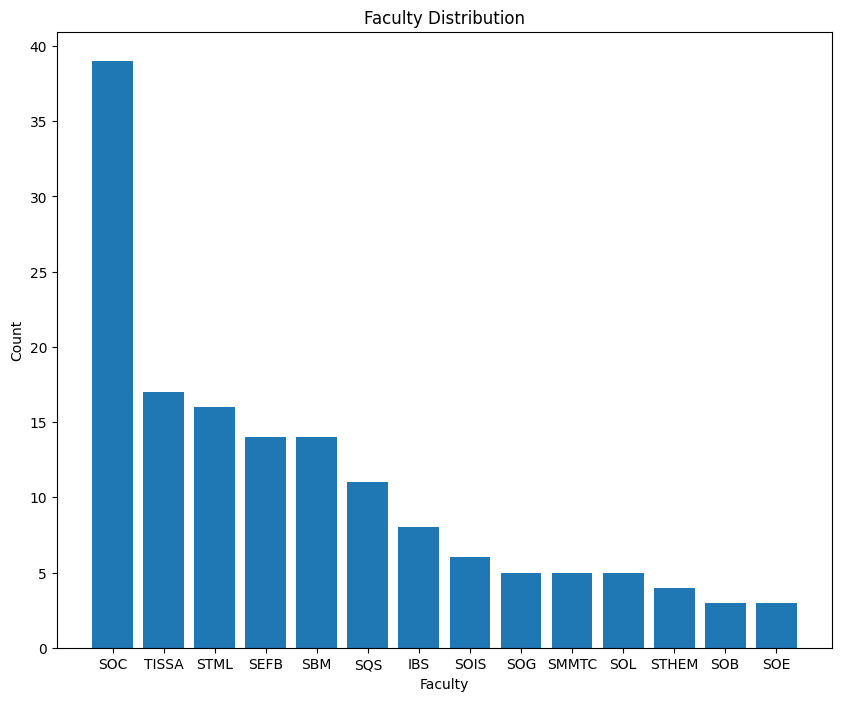

In [23]:
# faculty distribution
faculty=df['Faculty'].value_counts()
plt.figure(figsize=(10,8))
plt.bar(faculty.index,faculty.values)
plt.title('Faculty Distribution')
plt.xlabel('Faculty')
plt.ylabel('Count')
plt.show()

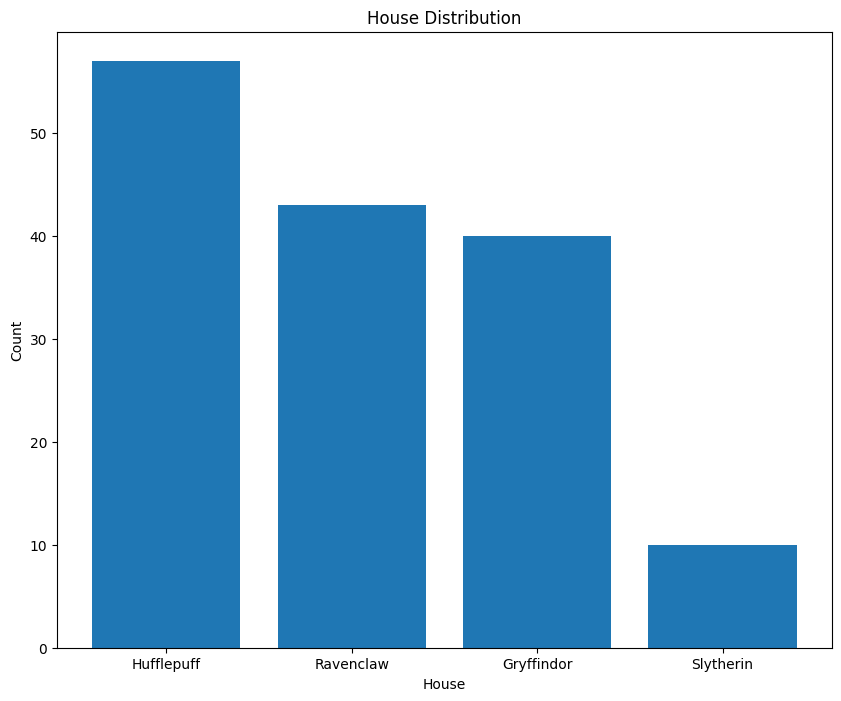

In [24]:
house_count=df['Hogwarts House'].value_counts()
plt.figure(figsize=(10,8))
plt.bar(house_count.index,house_count.values)
plt.title('House Distribution')
plt.xlabel('House')
plt.ylabel('Count')
plt.show()

In [25]:
'''df['GPA'].hits(bins=20)
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Count')
plt.show()'''

"df['GPA'].hits(bins=20)\nplt.title('GPA Distribution')\nplt.xlabel('GPA')\nplt.ylabel('Count')\nplt.show()"

In [26]:
df.describe().transpose()

count         mean           std     min  \
GPA                         150.0     3.571267      0.246868    2.89   
Estimated Household Income  150.0  8221.344595  19068.298153  750.00   
Number of Best Friends      150.0     5.885906     11.846632    0.00   

                                  25%      50%       75%       max  
GPA                            3.3675     3.56     3.785       4.0  
Estimated Household Income  2500.0000  4000.00  9000.000  200000.0  
Number of Best Friends         3.0000     4.00     6.000     140.0

<Axes: xlabel='GPA', ylabel='Estimated Household Income'>

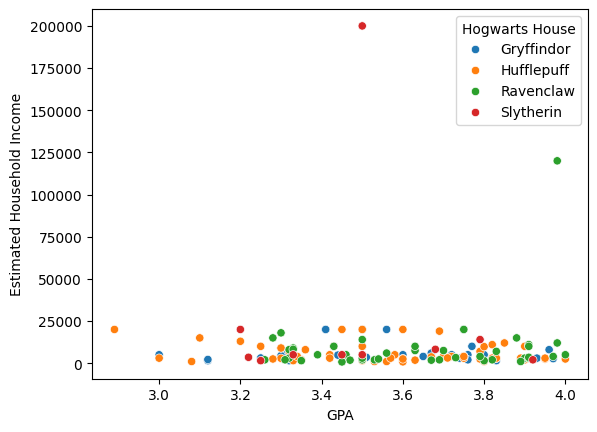

In [27]:
sns.scatterplot(data=df,x='GPA',y='Estimated Household Income',hue='Hogwarts House')

<Axes: xlabel='GPA', ylabel='Number of Best Friends'>

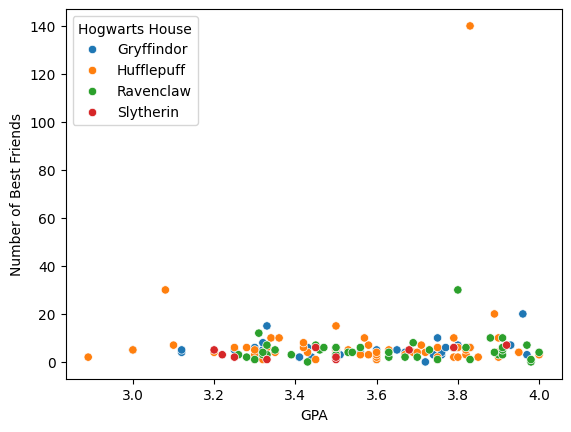

In [28]:
sns.scatterplot(data=df,x='GPA',y='Number of Best Friends',hue='Hogwarts House')

In [29]:
# ordinary encoding
ordinal_encoder = OrdinalEncoder()
df['Leadership Experience'] = ordinal_encoder.fit_transform(df[['Leadership Experience']])
df['Leadership Experience'].head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Leadership Experience, dtype: float64

In [30]:
ordinal_encoder.categories_

[array(['No', 'Yes'], dtype=object)]

In [31]:
# mapping for df['Personality Traits']
df['Personality Traits'].unique()

array(['Neuroticism', 'Agreeableness', 'Extraversion', 'Openness',
       'Conscientiousness'], dtype=object)

In [32]:
map_dict={
    'Openness':1,
    'Conscientiousness':2,
    'Extraversion':3,
    'Agreeableness':4,
    'Neuroticism':5
}
df['Personality Traits']=df['Personality Traits'].map(map_dict)
df.head()

Personality Traits Behavioural Traits           Hobbies   GPA  \
0                   5       Independence          Cerebral  3.72   
1                   4      Collaboration          Physical  3.60   
2                   4       Independence  Making-Tinkering  3.41   
3                   4       Independence  Making-Tinkering  3.41   
4                   3        Risk-Taking          Physical  3.44   

       Hometown           Inasis Co-curriculum Activities  \
0         Perak       Inasis MAS                TAEKWONDO   
1         Perak  Inasis SME BANK                TAEKWONDO   
2         Johor    Inasis PROTON              ISLAMIC ART   
3         Johor    Inasis PROTON              ISLAMIC ART   
4  Pulau Pinang       Inasis YAB                 PALAPES    

   Leadership Experience Favourite Cuisine  Estimated Household Income  \
0                    1.0           Western                      5000.0   
1                    0.0             Malay                      5000.0   
2                    1.0             Malay                     20000.0   
3                    1.0             Malay                     20000.0   
4                    1.0           Chinese                      4800.0   

   Number of Best Friends Faculty Hogwarts House  
0                     0.0     SQS     Gryffindor  
1                     1.0     IBS     Gryffindor  
2                     2.0     SOC     Gryffindor  
3                     2.0     SOC     Gryffindor  
4                     2.0     SQS     Gryffindor

In [33]:
# mapping for df['Behavioural Traits']
df['Behavioural Traits'].unique()

array(['Independence', 'Collaboration', 'Risk-Taking', 'Discipline'],
      dtype=object)

In [34]:
map_dict={
    'Independence': 1,
    'Collaboration': 2,
    'Discipline': 3,
    'Risk-Taking': 4
}
df['Behavioural Traits']=df['Behavioural Traits'].map(map_dict)
df.head()

Personality Traits  Behavioural Traits           Hobbies   GPA  \
0                   5                   1          Cerebral  3.72   
1                   4                   2          Physical  3.60   
2                   4                   1  Making-Tinkering  3.41   
3                   4                   1  Making-Tinkering  3.41   
4                   3                   4          Physical  3.44   

       Hometown           Inasis Co-curriculum Activities  \
0         Perak       Inasis MAS                TAEKWONDO   
1         Perak  Inasis SME BANK                TAEKWONDO   
2         Johor    Inasis PROTON              ISLAMIC ART   
3         Johor    Inasis PROTON              ISLAMIC ART   
4  Pulau Pinang       Inasis YAB                 PALAPES    

   Leadership Experience Favourite Cuisine  Estimated Household Income  \
0                    1.0           Western                      5000.0   
1                    0.0             Malay                      5000.0   
2                    1.0             Malay                     20000.0   
3                    1.0             Malay                     20000.0   
4                    1.0           Chinese                      4800.0   

   Number of Best Friends Faculty Hogwarts House  
0                     0.0     SQS     Gryffindor  
1                     1.0     IBS     Gryffindor  
2                     2.0     SOC     Gryffindor  
3                     2.0     SOC     Gryffindor  
4                     2.0     SQS     Gryffindor

In [35]:
# mapping for df['Hobbies']
df['Hobbies'].unique()

array(['Cerebral', 'Physical', 'Making-Tinkering', 'Creative',
       'Community-activities', 'Collecting'], dtype=object)

In [36]:
map_dict={
    'Physical':1,
    'Cerebral':2,
    'Community-activities':3,
    'Making-Tinkering': 4,
    'Creative': 5,
    'Collecting': 6
}
df['Hobbies']=df['Hobbies'].map(map_dict)
df.head()

Personality Traits  Behavioural Traits  Hobbies   GPA      Hometown  \
0                   5                   1        2  3.72         Perak   
1                   4                   2        1  3.60         Perak   
2                   4                   1        4  3.41         Johor   
3                   4                   1        4  3.41         Johor   
4                   3                   4        1  3.44  Pulau Pinang   

            Inasis Co-curriculum Activities  Leadership Experience  \
0       Inasis MAS                TAEKWONDO                    1.0   
1  Inasis SME BANK                TAEKWONDO                    0.0   
2    Inasis PROTON              ISLAMIC ART                    1.0   
3    Inasis PROTON              ISLAMIC ART                    1.0   
4       Inasis YAB                 PALAPES                     1.0   

  Favourite Cuisine  Estimated Household Income  Number of Best Friends  \
0           Western                      5000.0                     0.0   
1             Malay                      5000.0                     1.0   
2             Malay                     20000.0                     2.0   
3             Malay                     20000.0                     2.0   
4           Chinese                      4800.0                     2.0   

  Faculty Hogwarts House  
0     SQS     Gryffindor  
1     IBS     Gryffindor  
2     SOC     Gryffindor  
3     SOC     Gryffindor  
4     SQS     Gryffindor

In [37]:
# mapping for df['Hometown']
df['Hometown'].unique()

array(['Perak', 'Johor', 'Pulau Pinang', 'Selangor', 'Kelantan',
       'Putrajaya', 'Negeri Sembilan', 'Perlis', 'Kedah', 'Sabah',
       'Labuan', 'Pahang', 'Sarawak', 'Kuala Lumpur', 'Terengganu',
       'Melaka'], dtype=object)

In [38]:
map_dict = {
    'Sabah': 'Borneo',
    'Sarawak': 'Borneo',
    'Kuala Lumpur': 'Central',
    'Selangor': 'Central',
    'Perak': 'North',
    'Pahang': 'East',
    'Kedah': 'North',
    'Negeri Sembilan': 'Central',
    'Kelantan': 'East',
    'Perlis': 'North',
    'Pulau Pinang': 'North',
    'Melaka': 'South',
    'Terengganu': 'East',
    'Johor': 'South',
    'Labuan': 'Borneo',
    'Putrajaya': 'Central'
}

df['Hometown'] = df['Hometown'].map(map_dict)
df.head()

Personality Traits  Behavioural Traits  Hobbies   GPA Hometown  \
0                   5                   1        2  3.72    North   
1                   4                   2        1  3.60    North   
2                   4                   1        4  3.41    South   
3                   4                   1        4  3.41    South   
4                   3                   4        1  3.44    North   

            Inasis Co-curriculum Activities  Leadership Experience  \
0       Inasis MAS                TAEKWONDO                    1.0   
1  Inasis SME BANK                TAEKWONDO                    0.0   
2    Inasis PROTON              ISLAMIC ART                    1.0   
3    Inasis PROTON              ISLAMIC ART                    1.0   
4       Inasis YAB                 PALAPES                     1.0   

  Favourite Cuisine  Estimated Household Income  Number of Best Friends  \
0           Western                      5000.0                     0.0   
1             Malay                      5000.0                     1.0   
2             Malay                     20000.0                     2.0   
3             Malay                     20000.0                     2.0   
4           Chinese                      4800.0                     2.0   

  Faculty Hogwarts House  
0     SQS     Gryffindor  
1     IBS     Gryffindor  
2     SOC     Gryffindor  
3     SOC     Gryffindor  
4     SQS     Gryffindor

In [39]:
df['Hometown'].unique()

array(['North', 'South', 'Central', 'East', 'Borneo'], dtype=object)

In [40]:
map_dict={
    'Borneo':1,
    'Central':2,
    'East':3,
    'North':4,
    'South':5
}
df['Hometown']=df['Hometown'].map(map_dict)
df.head()

Personality Traits  Behavioural Traits  Hobbies   GPA  Hometown  \
0                   5                   1        2  3.72         4   
1                   4                   2        1  3.60         4   
2                   4                   1        4  3.41         5   
3                   4                   1        4  3.41         5   
4                   3                   4        1  3.44         4   

            Inasis Co-curriculum Activities  Leadership Experience  \
0       Inasis MAS                TAEKWONDO                    1.0   
1  Inasis SME BANK                TAEKWONDO                    0.0   
2    Inasis PROTON              ISLAMIC ART                    1.0   
3    Inasis PROTON              ISLAMIC ART                    1.0   
4       Inasis YAB                 PALAPES                     1.0   

  Favourite Cuisine  Estimated Household Income  Number of Best Friends  \
0           Western                      5000.0                     0.0   
1             Malay                      5000.0                     1.0   
2             Malay                     20000.0                     2.0   
3             Malay                     20000.0                     2.0   
4           Chinese                      4800.0                     2.0   

  Faculty Hogwarts House  
0     SQS     Gryffindor  
1     IBS     Gryffindor  
2     SOC     Gryffindor  
3     SOC     Gryffindor  
4     SQS     Gryffindor

In [41]:
df['Inasis'].unique()

array(['Inasis MAS', 'Inasis SME BANK', 'Inasis PROTON', 'Inasis YAB',
       'Rumah Sendiri', 'Inasis TRADEWINDS', 'Inasis GRANTT',
       'Inasis BSN', 'Inasis MISC', 'Inasis MUAMALAT', 'Inasis PETRONAS',
       'Inasis MAYBANK', 'Inasis BANK RAKYAT', 'Inasis TM',
       'Inasis Sime Darby', 'Inasis TNB', 'SISIRAN', 'TAMAN UNIVERSITI'],
      dtype=object)

In [42]:
map_dict = {
    'Inasis TM':'B',
    'Inasis BANK RAKYAT':'D',
    'Inasis MAS': 'A',
    'Rumah Sendiri': 'F',
    'Inasis TRADEWINDS': 'A',
    'SISIRAN': 'E',
    'Inasis PETRONAS': 'B',
    'Inasis MUAMALAT': 'C',
    'Inasis TNB': 'A',
    'Inasis BSN':'B',
    'Inasis GRANTT':'B',
    'Inasis PROTON':'A',
    'Inasis MISC': 'B',
    'Inasis SME BANK':'D',
    'Inasis YAB': 'C',
    'Inasis MAYBANK': 'A',
    'TAMAN UNIVERSITI': 'E',
    'Inasis Sime Darby':'B'
}
df['Inasis']=df['Inasis'].map(map_dict)
df.head()

Personality Traits  Behavioural Traits  Hobbies   GPA  Hometown Inasis  \
0                   5                   1        2  3.72         4      A   
1                   4                   2        1  3.60         4      D   
2                   4                   1        4  3.41         5      A   
3                   4                   1        4  3.41         5      A   
4                   3                   4        1  3.44         4      C   

  Co-curriculum Activities  Leadership Experience Favourite Cuisine  \
0                TAEKWONDO                    1.0           Western   
1                TAEKWONDO                    0.0             Malay   
2              ISLAMIC ART                    1.0             Malay   
3              ISLAMIC ART                    1.0             Malay   
4                 PALAPES                     1.0           Chinese   

   Estimated Household Income  Number of Best Friends Faculty Hogwarts House  
0                      5000.0                     0.0     SQS     Gryffindor  
1                      5000.0                     1.0     IBS     Gryffindor  
2                     20000.0                     2.0     SOC     Gryffindor  
3                     20000.0                     2.0     SOC     Gryffindor  
4                      4800.0                     2.0     SQS     Gryffindor

In [43]:
df['Estimated Household Income'].unique()
def map_income_to_class(income):
  if income <= 6338:
    return 1
  elif 6339 < income <= 10959:
    return 2
  else:
    return 3

df['Estimated Household Income'] = df['Estimated Household Income'].apply(map_income_to_class)
df.head()

Personality Traits  Behavioural Traits  Hobbies   GPA  Hometown Inasis  \
0                   5                   1        2  3.72         4      A   
1                   4                   2        1  3.60         4      D   
2                   4                   1        4  3.41         5      A   
3                   4                   1        4  3.41         5      A   
4                   3                   4        1  3.44         4      C   

  Co-curriculum Activities  Leadership Experience Favourite Cuisine  \
0                TAEKWONDO                    1.0           Western   
1                TAEKWONDO                    0.0             Malay   
2              ISLAMIC ART                    1.0             Malay   
3              ISLAMIC ART                    1.0             Malay   
4                 PALAPES                     1.0           Chinese   

   Estimated Household Income  Number of Best Friends Faculty Hogwarts House  
0                           1                     0.0     SQS     Gryffindor  
1                           1                     1.0     IBS     Gryffindor  
2                           3                     2.0     SOC     Gryffindor  
3                           3                     2.0     SOC     Gryffindor  
4                           1                     2.0     SQS     Gryffindor

In [44]:
df['Inasis'].unique()

array(['A', 'D', 'C', 'F', 'B', 'E'], dtype=object)

In [45]:
map_dict={
    'A':1,
    'B':2,
    'C':3,
    'D':4,
    'E':5,
    'F':6
}
df['Inasis']=df['Inasis'].map(map_dict)

In [46]:
df['Co-curriculum Activities'].unique()

array(['TAEKWONDO', 'ISLAMIC ART', 'PALAPES ', 'LEADERSHIP', 'ANGKLUNG ',
       'FUTSAL', 'LANDSCAPE', 'CAKLEMPONG', 'BADMINTON ', 'AQUACULTURE',
       'PENGANGKAP', 'PRS', 'KARATE', 'DEBAT', 'HOCKEY', 'BASKETBALL ',
       'COMMUNITY DEVELOPMENT', 'SUKSIS', 'EVENT MANAGEMENT', 'COSTUME',
       'OUTDOOR RECREATION (OUTREC)', 'ARTS & PAINTING',
       'BRIDGED RELASIS', 'SENI LAKON', 'GAMELAN', 'ORCHESTRA',
       'VOLLEYBALL', 'HANDBALL', 'FAMILY DEVELOPMENT', 'CHESS', 'CYCLING',
       'FIRE BRIGADE', 'PUBLIC SPEAKING', 'GRAPHIC', 'KOR SISKOR',
       'FRANCHISE', 'SCOUT', 'VIDEO TECHNOLOGY', 'VOLUNTEERISM ',
       'NETBALL', 'RELASIS', 'PALAPES', 'KEROHANIAN', 'SPORT SCIENCE',
       'PBSM', 'MALAY DANCE', 'SISKOR', 'SWIMMING', 'SILAT', 'ST.JOHN',
       'INTERIOR DESIGN', 'OLAHRAGA', 'PING PONG', 'FOOTBALL', 'COIR',
       'GOLF'], dtype=object)

In [47]:
# label encoder for kok
label_encoder = LabelEncoder()
df['Co-curriculum Activities'] = label_encoder.fit_transform(df['Co-curriculum Activities'])
df['Co-curriculum Activities'].head()

0    52
1    52
2    25
3    25
4    37
Name: Co-curriculum Activities, dtype: int64

In [48]:
df['Favourite Cuisine'].unique()

array(['Western', 'Malay', 'Chinese', 'Thai', 'Korean', 'Indian',
       'Japanese'], dtype=object)

In [49]:
# label encoder for favourite cuisine
label_encoder = LabelEncoder()
df['Favourite Cuisine'] = label_encoder.fit_transform(df['Favourite Cuisine'])
df['Favourite Cuisine'].head()

0    6
1    4
2    4
3    4
4    0
Name: Favourite Cuisine, dtype: int64

In [50]:
# label encoder for faculty
label_encoder=LabelEncoder()
df['Faculty']=label_encoder.fit_transform(df['Faculty'])
df['Faculty'].head()

0    10
1     0
2     5
3     5
4    10
Name: Faculty, dtype: int64

In [51]:
df['Hogwarts House'].unique()

array(['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin'], dtype=object)

In [52]:
map_dict = {
    'Ravenclaw': 1,
    'Slytherin': 2,
    'Gryffindor': 3,
    'Hufflepuff': 4
}
df['Hogwarts House'] = df['Hogwarts House'].map(map_dict)
df.head()

Personality Traits  Behavioural Traits  Hobbies   GPA  Hometown  Inasis  \
0                   5                   1        2  3.72         4       1   
1                   4                   2        1  3.60         4       4   
2                   4                   1        4  3.41         5       1   
3                   4                   1        4  3.41         5       1   
4                   3                   4        1  3.44         4       3   

   Co-curriculum Activities  Leadership Experience  Favourite Cuisine  \
0                        52                    1.0                  6   
1                        52                    0.0                  4   
2                        25                    1.0                  4   
3                        25                    1.0                  4   
4                        37                    1.0                  0   

   Estimated Household Income  Number of Best Friends  Faculty  Hogwarts House  
0                           1                     0.0       10               3  
1                           1                     1.0        0               3  
2                           3                     2.0        5               3  
3                           3                     2.0        5               3  
4                           1                     2.0       10               3

In [53]:
# standardization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_cols=['GPA','Estimated Household Income','Number of Best Friends']
df[num_cols]=scaler.fit_transform(df[num_cols])
df.head()

Personality Traits  Behavioural Traits  Hobbies       GPA  Hometown  \
0                   5                   1        2  0.747748         4   
1                   4                   2        1  0.639640         4   
2                   4                   1        4  0.468468         5   
3                   4                   1        4  0.468468         5   
4                   3                   4        1  0.495495         4   

   Inasis  Co-curriculum Activities  Leadership Experience  Favourite Cuisine  \
0       1                        52                    1.0                  6   
1       4                        52                    0.0                  4   
2       1                        25                    1.0                  4   
3       1                        25                    1.0                  4   
4       3                        37                    1.0                  0   

   Estimated Household Income  Number of Best Friends  Faculty  Hogwarts House  
0                         0.0                0.000000       10               3  
1                         0.0                0.007143        0               3  
2                         1.0                0.014286        5               3  
3                         1.0                0.014286        5               3  
4                         0.0                0.014286       10               3

In [54]:
# robust scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_cols=['Personality Traits','Behavioural Traits','Hobbies','Hometown','Inasis','Co-curriculum Activities','Favourite Cuisine','Faculty']
df[num_cols]=scaler.fit_transform(df[num_cols])
df.head()

Personality Traits  Behavioural Traits  Hobbies       GPA  Hometown  \
0                1.00            0.000000      0.2  0.747748      0.75   
1                0.75            0.333333      0.0  0.639640      0.75   
2                0.75            0.000000      0.6  0.468468      1.00   
3                0.75            0.000000      0.6  0.468468      1.00   
4                0.50            1.000000      0.0  0.495495      0.75   

   Inasis  Co-curriculum Activities  Leadership Experience  Favourite Cuisine  \
0     0.0                  0.945455                    1.0           1.000000   
1     0.6                  0.945455                    0.0           0.666667   
2     0.0                  0.454545                    1.0           0.666667   
3     0.0                  0.454545                    1.0           0.666667   
4     0.4                  0.672727                    1.0           0.000000   

   Estimated Household Income  Number of Best Friends   Faculty  \
0                         0.0                0.000000  0.769231   
1                         0.0                0.007143  0.000000   
2                         1.0                0.014286  0.384615   
3                         1.0                0.014286  0.384615   
4                         0.0                0.014286  0.769231   

   Hogwarts House  
0               3  
1               3  
2               3  
3               3  
4               3

In [55]:
from sklearn.preprocessing import MinMaxScaler
scalerr=MinMaxScaler()
num_cols=['Hobbies','Inasis','Leadership Experience','Number of Best Friends']
df[num_cols]=scalerr.fit_transform(df[num_cols])
df.head()

Personality Traits  Behavioural Traits  Hobbies       GPA  Hometown  \
0                1.00            0.000000      0.2  0.747748      0.75   
1                0.75            0.333333      0.0  0.639640      0.75   
2                0.75            0.000000      0.6  0.468468      1.00   
3                0.75            0.000000      0.6  0.468468      1.00   
4                0.50            1.000000      0.0  0.495495      0.75   

   Inasis  Co-curriculum Activities  Leadership Experience  Favourite Cuisine  \
0     0.0                  0.945455                    1.0           1.000000   
1     0.6                  0.945455                    0.0           0.666667   
2     0.0                  0.454545                    1.0           0.666667   
3     0.0                  0.454545                    1.0           0.666667   
4     0.4                  0.672727                    1.0           0.000000   

   Estimated Household Income  Number of Best Friends   Faculty  \
0                         0.0                0.000000  0.769231   
1                         0.0                0.007143  0.000000   
2                         1.0                0.014286  0.384615   
3                         1.0                0.014286  0.384615   
4                         0.0                0.014286  0.769231   

   Hogwarts House  
0               3  
1               3  
2               3  
3               3  
4               3

In [56]:
'''with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scalerr, scaler_file)'''

"with open('scaler.pkl', 'wb') as scaler_file:\n    pickle.dump(scalerr, scaler_file)"

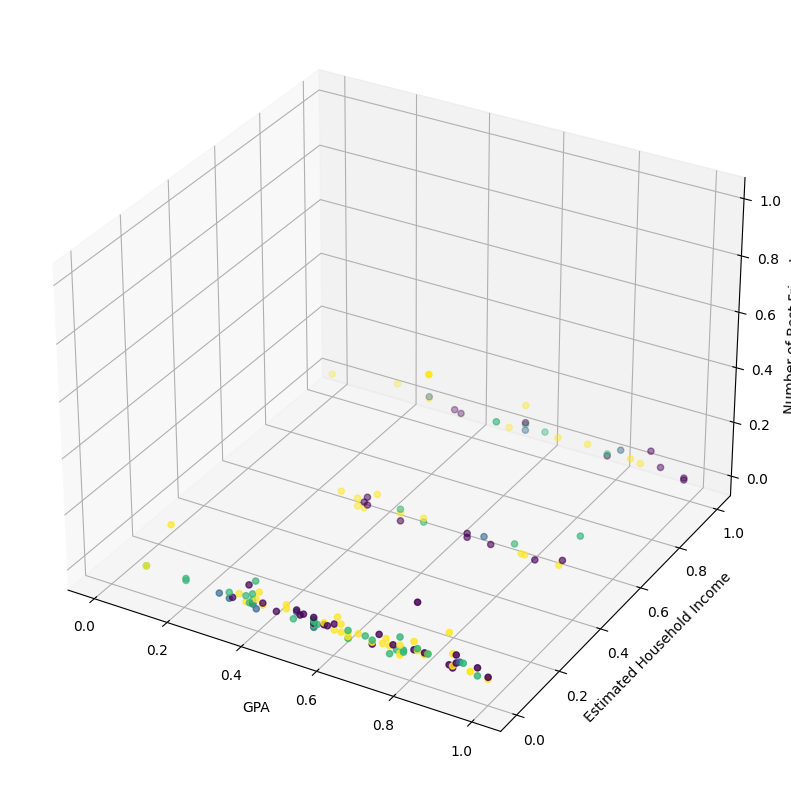

In [57]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['GPA'],df['Estimated Household Income'],df['Number of Best Friends'],c=df['Hogwarts House'],cmap='viridis')
ax.set_xlabel('GPA')
ax.set_ylabel('Estimated Household Income')
ax.set_zlabel('Number of Best Friends')
plt.show()

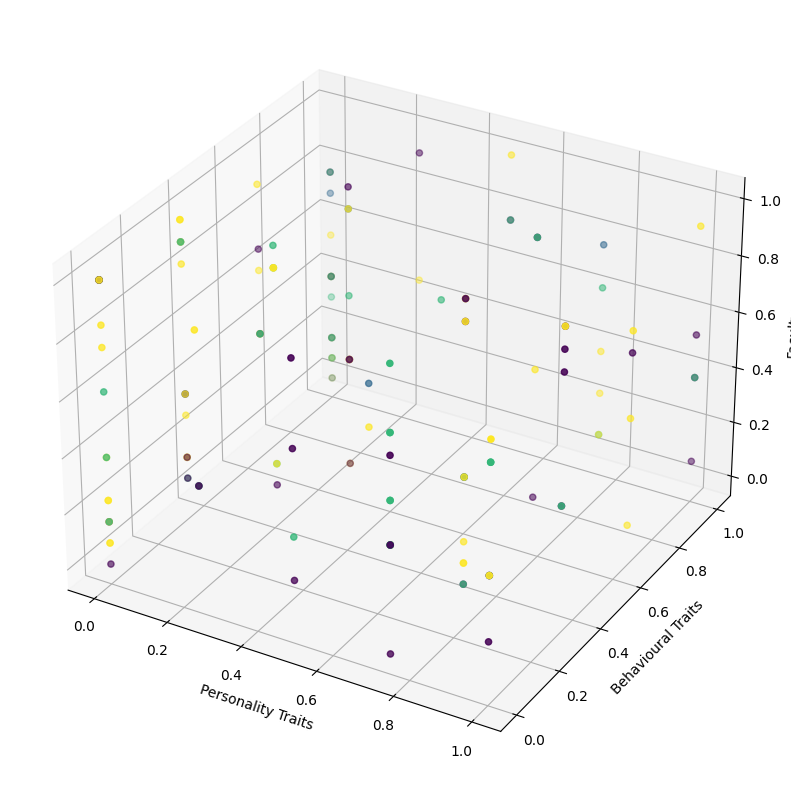

In [58]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Personality Traits'],df['Behavioural Traits'],df['Faculty'],c=df['Hogwarts House'],cmap='viridis')
ax.set_xlabel('Personality Traits')
ax.set_ylabel('Behavioural Traits')
ax.set_zlabel('Faculty')
plt.show()

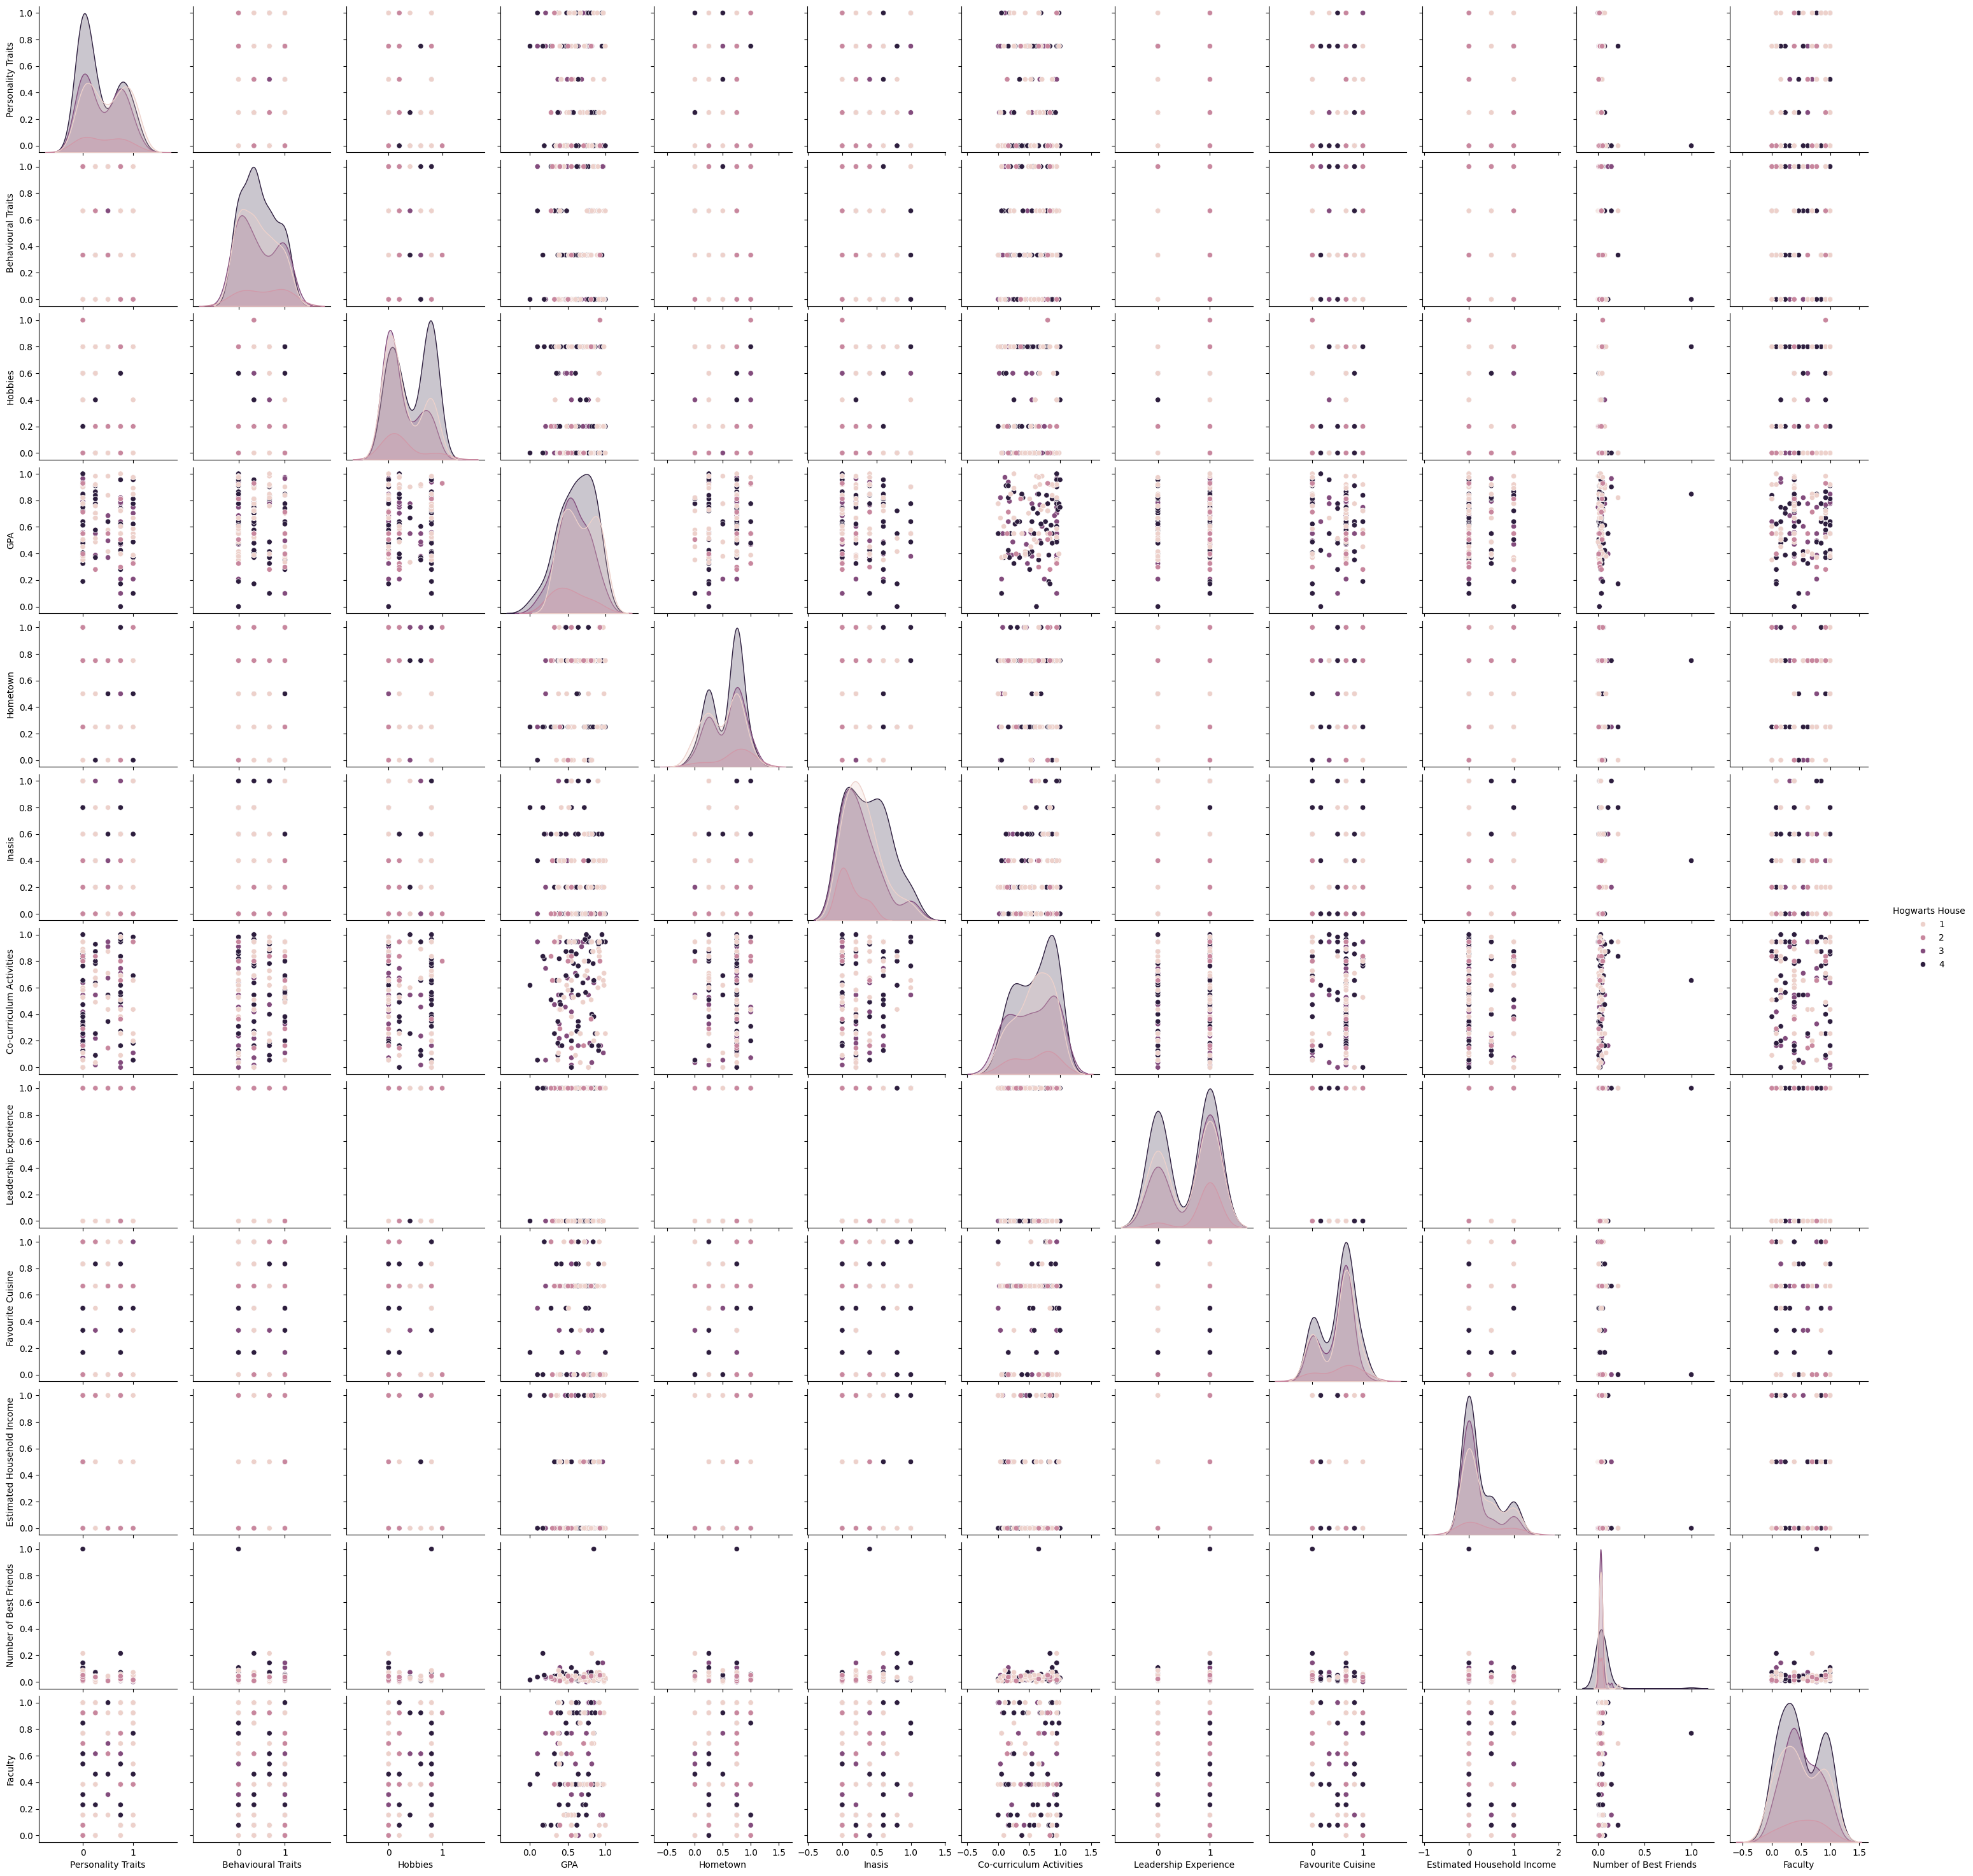

In [59]:
sns.pairplot(df,hue='Hogwarts House')
plt.show()

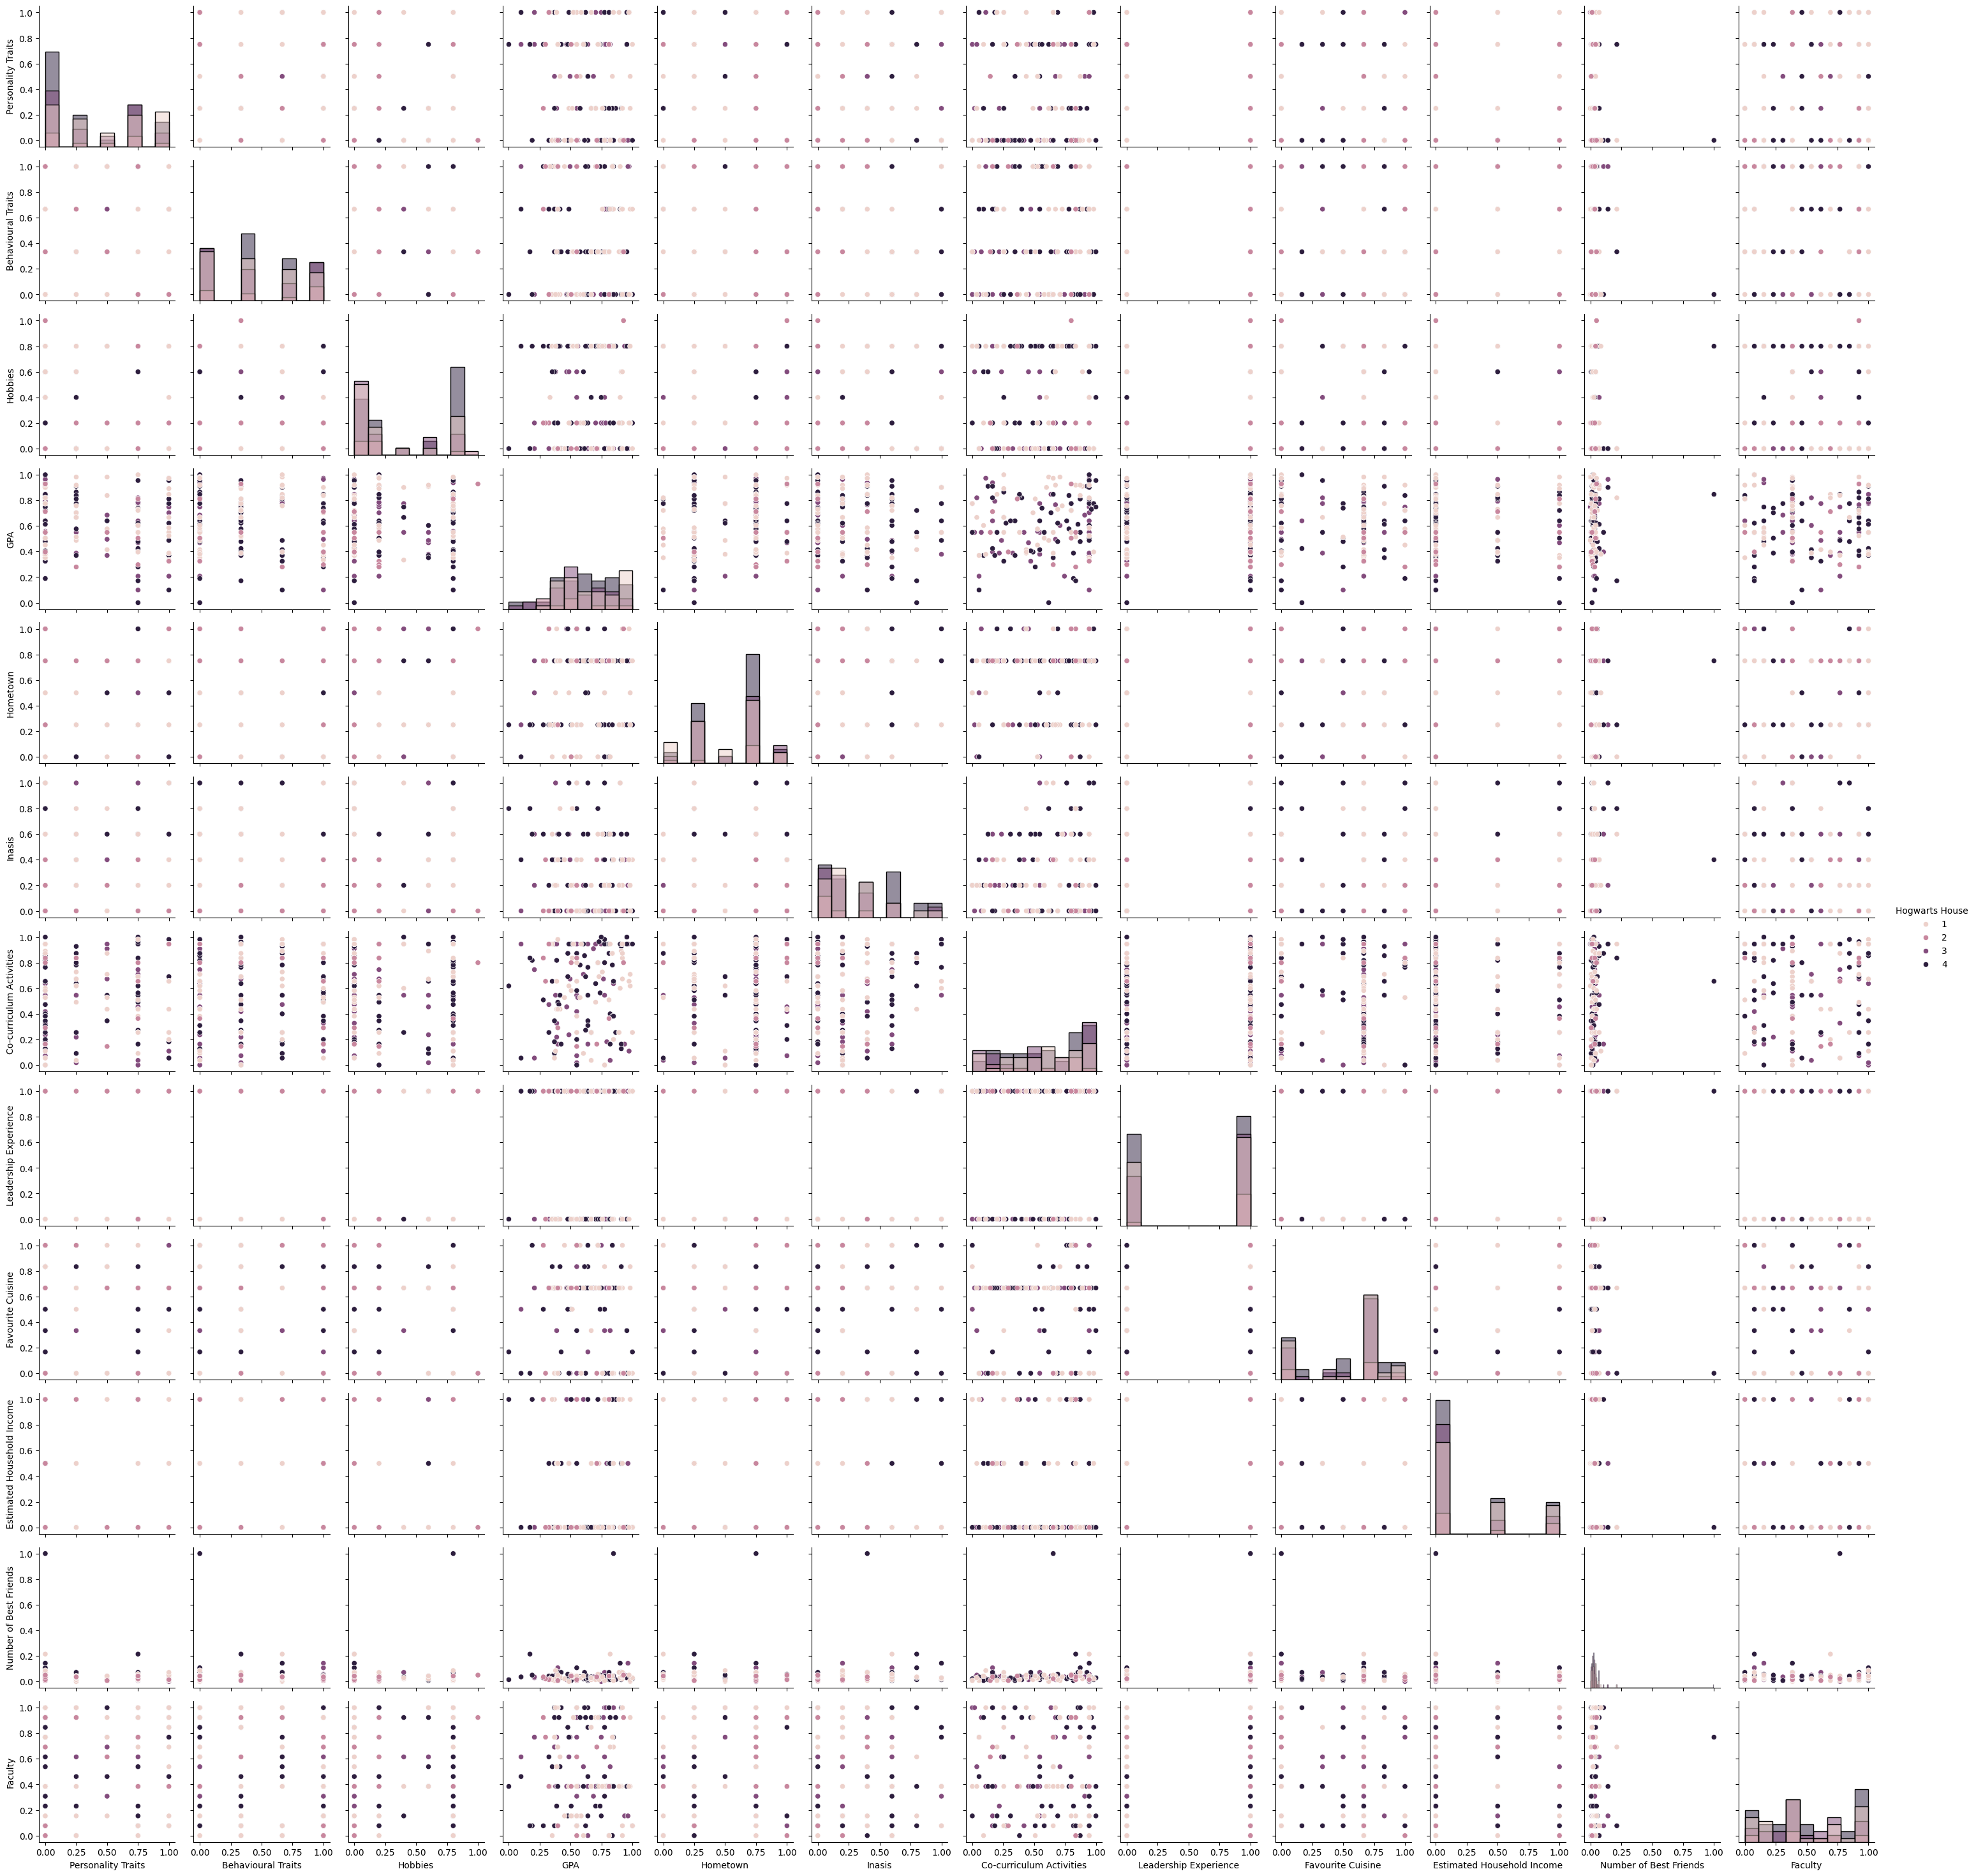

In [60]:
g = sns.PairGrid(df, hue='Hogwarts House')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

<Axes: >

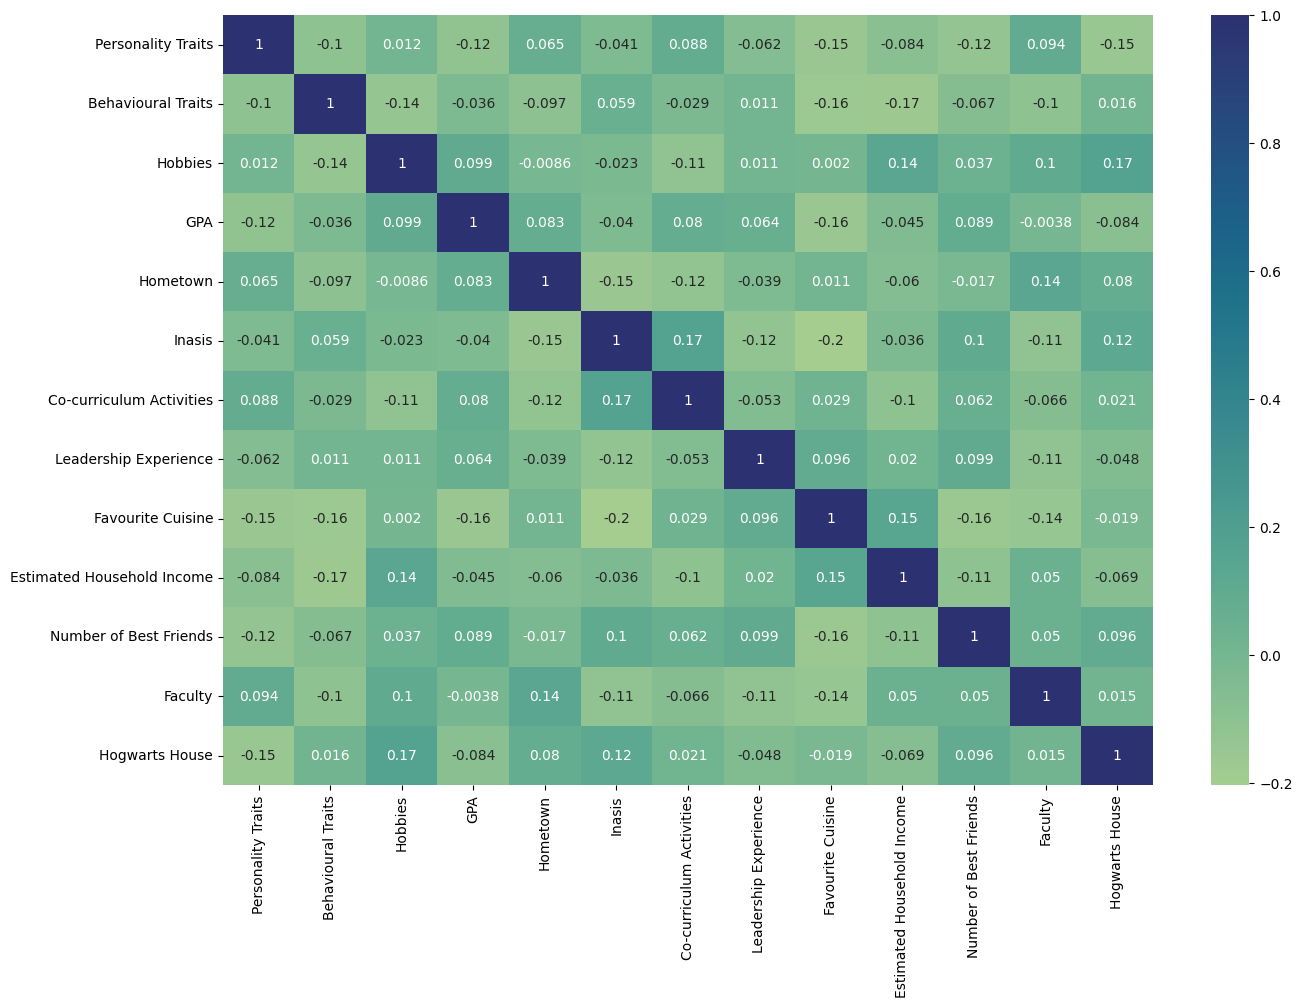

In [61]:
corr=df.corr()
corr
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='crest')

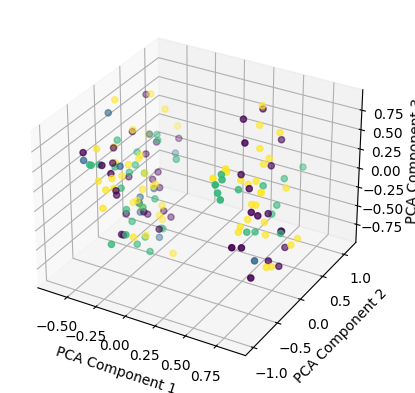

In [62]:
from sklearn.decomposition import PCA
df_X=df.drop('Hogwarts House',axis=1)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=df['Hogwarts House'])
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

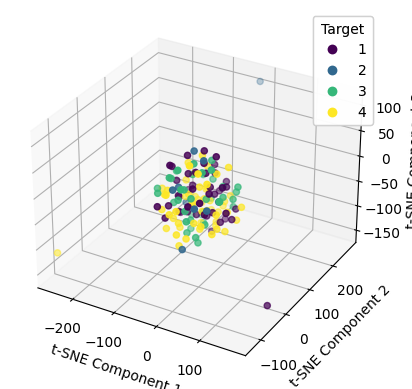

In [63]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne_result = tsne.fit_transform(df_X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=df['Hogwarts House'])
legend1 = ax.legend(*scatter.legend_elements(), title="Target")
ax.add_artist(legend1)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()

In [64]:
X = df.drop("Hogwarts House", axis=1)
y = pd.DataFrame(df["Hogwarts House"])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
X_train.shape, X_test.shape

((105, 12), (45, 12))

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Personality Traits          150 non-null    float64
 1   Behavioural Traits          150 non-null    float64
 2   Hobbies                     150 non-null    float64
 3   GPA                         150 non-null    float64
 4   Hometown                    150 non-null    float64
 5   Inasis                      150 non-null    float64
 6   Co-curriculum Activities    150 non-null    float64
 7   Leadership Experience       150 non-null    float64
 8   Favourite Cuisine           150 non-null    float64
 9   Estimated Household Income  150 non-null    float64
 10  Number of Best Friends      150 non-null    float64
 11  Faculty                     150 non-null    float64
 12  Hogwarts House              150 non-null    int64  
dtypes: float64(12), int64(1)
memory usa

In [68]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [69]:
y_pred_gini=clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4444


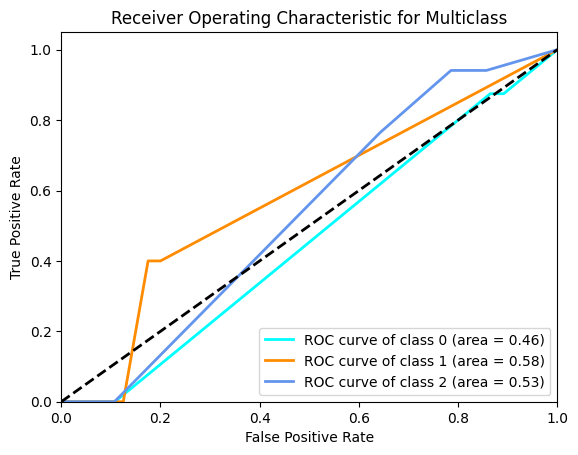

In [70]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming y is the label array and has more than 2 classes
classes = np.unique(y)
n_classes = len(classes)

# Binarize the output
y_bin = label_binarize(y, classes=classes)
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# One-vs-rest classifier
clf_ovr = OneVsRestClassifier(DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5))
clf_ovr.fit(X_train, y_train_bin)

# Predict probabilities
y_pred_prob = clf_ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()


<Figure size 1000x700 with 0 Axes>

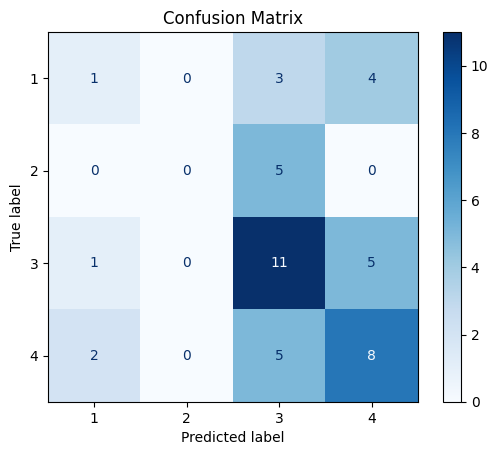

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the class labels for the test set
y_pred = clf_gini.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [72]:
# univariate selection
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures=SelectKBest(score_func=chi2,k='all').fit(X,y)
dfscores=pd.DataFrame(bestfeatures.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores.nlargest(5,'Score'))



                        Specs     Score
2                     Hobbies  3.381600
5                      Inasis  2.174273
7       Leadership Experience  1.958021
9  Estimated Household Income  1.603990
0          Personality Traits  1.293700


In [73]:
X_train_selected=bestfeatures.transform(X_train)
X_test_selected=bestfeatures.transform(X_test)
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(X_train_selected,y_train)
y_pred_gini=clf_gini.predict(X_test_selected)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4444


In [74]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures=SelectKBest(score_func=chi2,k=3).fit(X,y)
dfscores=pd.DataFrame(bestfeatures.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores.nlargest(5,'Score'))

                        Specs     Score
2                     Hobbies  3.381600
5                      Inasis  2.174273
7       Leadership Experience  1.958021
9  Estimated Household Income  1.603990
0          Personality Traits  1.293700


In [75]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_train, y_train)
selected_features = X_train.columns[mi_scores.argsort()[::-1][:3]]

print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features : {list(selected_features)}")

Number of selected features: 3
Selected features : ['Leadership Experience', 'Faculty', 'Number of Best Friends']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


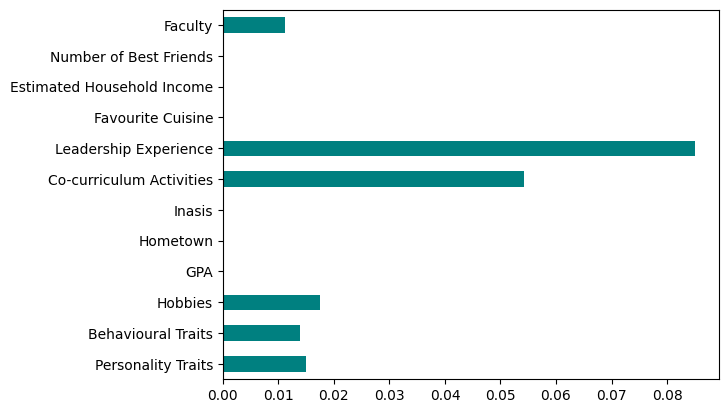

In [76]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importances = mutual_info_classif(X_train, y_train)
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [77]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5,step=1)
rfe.fit(X,y)
selected_features = X_train.columns[rfe.support_]

print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features : {list(selected_features)}")

Number of selected features: 5
Selected features : ['GPA', 'Inasis', 'Co-curriculum Activities', 'Number of Best Friends', 'Faculty']


In [78]:
X_train_selected=bestfeatures.transform(X_train)
X_test_selected=bestfeatures.transform(X_test)
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=3,min_samples_leaf=5)
clf_gini.fit(X_train_selected,y_train)
y_pred_gini=clf_gini.predict(X_test_selected)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.3778


In [84]:
X_train.head()

Personality Traits  Behavioural Traits  Hobbies       GPA  Hometown  \
81                 0.25            1.000000      0.0  0.774775      0.00   
133                1.00            0.000000      0.2  0.972973      1.00   
137                0.00            0.000000      0.8  0.378378      0.50   
75                 0.25            0.333333      0.4  0.666667      0.75   
109                1.00            1.000000      0.0  0.387387      0.75   

     Inasis  Co-curriculum Activities  Leadership Experience  \
81      0.4                  0.800000                    1.0   
133     0.4                  0.654545                    0.0   
137     0.2                  0.109091                    0.0   
75      0.2                  0.254545                    0.0   
109     0.4                  0.654545                    0.0   

     Favourite Cuisine  Estimated Household Income  Number of Best Friends  \
81            0.000000                         0.0                0.042857   
133           0.000000                         0.0                0.050000   
137           0.666667                         0.0                0.085714   
75            0.666667                         0.0                0.035714   
109           0.000000                         0.0                0.021429   

      Faculty  
81   0.461538  
133  0.384615  
137  1.000000  
75   0.923077  
109  0.538462

In [80]:
y_train.head()

Hogwarts House
81                4
133               1
137               1
75                4
109               1

In [176]:
from sklearn import neighbors
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=3,weights='uniform')
KNN_model.fit(X_train,y_train)
pred=KNN_model.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, pred)))

Model accuracy score with criterion gini index: 0.2889


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [177]:
from sklearn import neighbors
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=4,weights='distance')
KNN_model.fit(X_train,y_train)
pred=KNN_model.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, pred)))

Model accuracy score with criterion gini index: 0.3111


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [178]:
correlation=X_train.corr()
correlation

Personality Traits  Behavioural Traits   Hobbies  \
Personality Traits                    1.000000           -0.124168 -0.003458   
Behavioural Traits                   -0.124168            1.000000 -0.224835   
Hobbies                              -0.003458           -0.224835  1.000000   
GPA                                  -0.125644           -0.007527  0.040461   
Hometown                              0.147437           -0.082130 -0.011370   
Inasis                               -0.016268            0.110533 -0.062751   
Co-curriculum Activities             -0.011070           -0.109318 -0.097267   
Leadership Experience                -0.105599           -0.008986  0.035123   
Favourite Cuisine                    -0.133184           -0.150549 -0.047339   
Estimated Household Income            0.004863           -0.159914  0.286236   
Number of Best Friends               -0.139675           -0.093126  0.026922   
Faculty                               0.106378           -0.193152  0.118464   

                                 GPA  Hometown    Inasis  \
Personality Traits         -0.125644  0.147437 -0.016268   
Behavioural Traits         -0.007527 -0.082130  0.110533   
Hobbies                     0.040461 -0.011370 -0.062751   
GPA                         1.000000  0.027338 -0.101106   
Hometown                    0.027338  1.000000 -0.146332   
Inasis                     -0.101106 -0.146332  1.000000   
Co-curriculum Activities    0.266105 -0.051447  0.231079   
Leadership Experience       0.141940 -0.176332 -0.163364   
Favourite Cuisine          -0.147441  0.004633 -0.170118   
Estimated Household Income  0.014574 -0.035227 -0.077893   
Number of Best Friends      0.089015 -0.006659  0.118182   
Faculty                     0.030639  0.229853 -0.100798   

                            Co-curriculum Activities  Leadership Experience  \
Personality Traits                         -0.011070              -0.105599   
Behavioural Traits                         -0.109318              -0.008986   
Hobbies                                    -0.097267               0.035123   
GPA                                         0.266105               0.141940   
Hometown                                   -0.051447              -0.176332   
Inasis                                      0.231079              -0.163364   
Co-curriculum Activities                    1.000000               0.013333   
Leadership Experience                       0.013333               1.000000   
Favourite Cuisine                          -0.023722               0.161018   
Estimated Household Income                 -0.173284               0.080828   
Number of Best Friends                      0.081064               0.124830   
Faculty                                    -0.056190              -0.202517   

                            Favourite Cuisine  Estimated Household Income  \
Personality Traits                  -0.133184                    0.004863   
Behavioural Traits                  -0.150549                   -0.159914   
Hobbies                             -0.047339                    0.286236   
GPA                                 -0.147441                    0.014574   
Hometown                             0.004633                   -0.035227   
Inasis                              -0.170118                   -0.077893   
Co-curriculum Activities            -0.023722                   -0.173284   
Leadership Experience                0.161018                    0.080828   
Favourite Cuisine                    1.000000                    0.180026   
Estimated Household Income           0.180026                    1.000000   
Number of Best Friends              -0.194122                   -0.117127   
Faculty                             -0.095273                    0.054192   

                            Number of Best Friends   Faculty  
Personality Traits                       -0.139675  0.106378  
Behavioural Traits                       -0.093126

<Axes: >

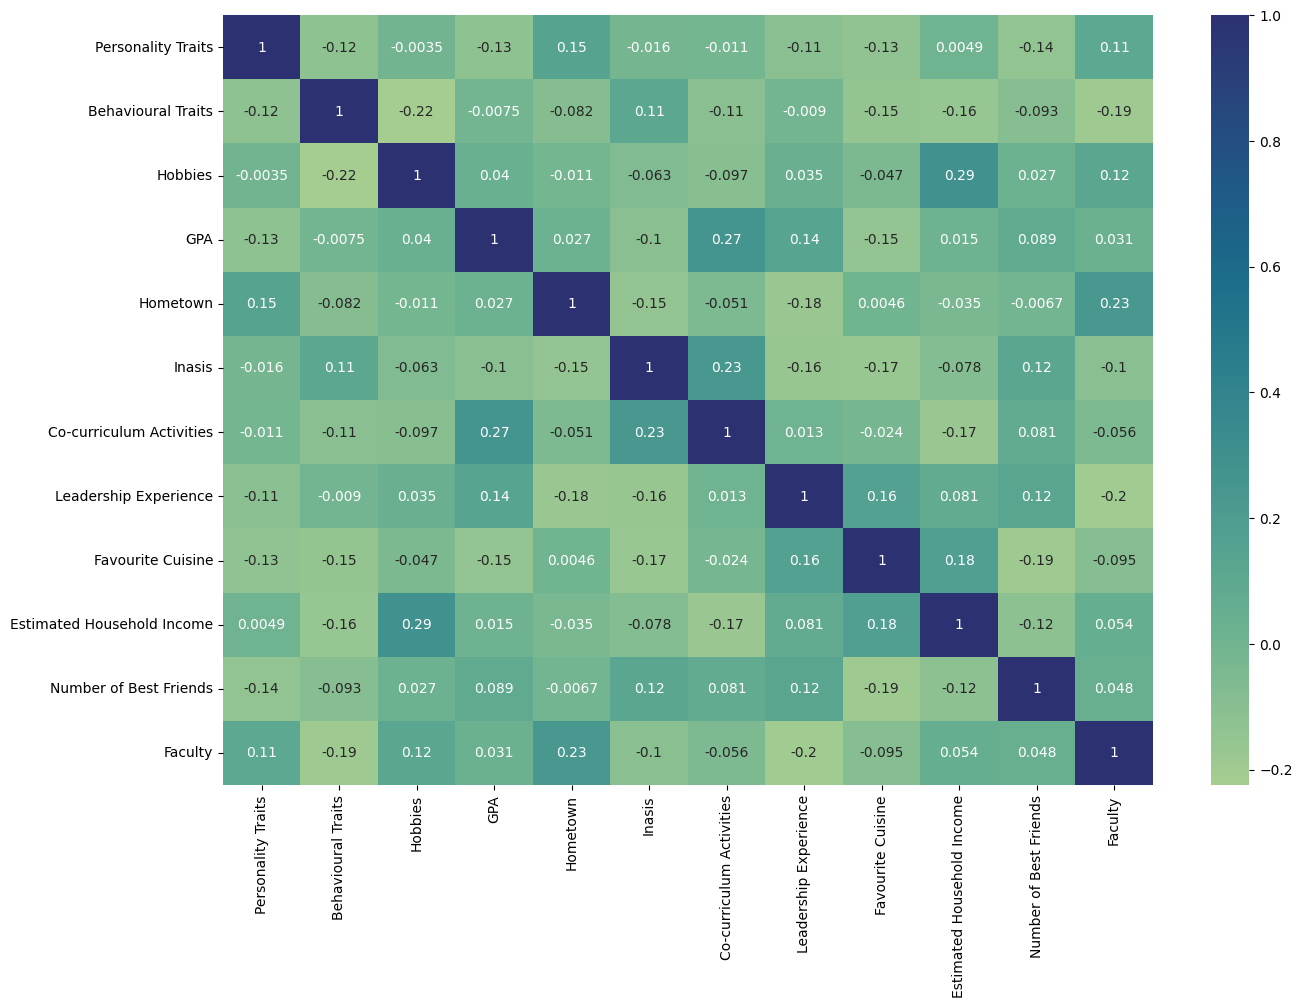

In [179]:
#### Visualizing correlation

plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,cmap='crest')

In [88]:
# decision tree
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3,min_samples_leaf=5,random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.3333


In [89]:
# knn
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn import neighbors
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=3,weights='uniform')
KNN_model.fit(X_train,y_train)
pred=KNN_model.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, pred)))

Model accuracy score with criterion gini index: 0.2667


In [182]:
# logistic regression
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3111


In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],   # Type of penalty
    'solver': ['liblinear', 'saga']          # Solver to use
}

# Create a LogisticRegression model
logreg = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print('Model accuracy score with best parameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Model accuracy score with best parameters: 0.3333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [92]:
# naive bayes
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.2667


In [91]:
# svm
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3111


In [90]:
# rbf svm
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
svm = SVC(kernel='rbf',gamma=0.1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3333


In [96]:
# polynomial svm
# rbf svm
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
svm = SVC(kernel='poly',gamma=0.1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3333


In [188]:
# sigmoid svm
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid',gamma=0.1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3333


In [189]:
# sigmoid svm
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid',gamma='auto')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3333


In [106]:
# random forest
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,criterion='log_loss',random_state=42,max_depth=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3333


In [103]:
# random forest
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=42,max_depth=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3333


In [110]:
# neural network
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-9,hidden_layer_sizes=(3, 5), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.3111


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [111]:
# neural network
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=1e-9,hidden_layer_sizes=(15,25,10), random_state=42,activation='relu',learning_rate='adaptive')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.4000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [193]:
# neural network
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'solver': ['lbfgs', 'adam', 'sgd'],
    'alpha': [1e-5, 1e-4, 1e-3],
    'hidden_layer_sizes': [(7, 12), (10, 10), (50,), (10, 20, 10)],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant', 'adaptive']
}

# Create a base model
mlp = MLPClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best found parameters
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters found:  {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (7, 12), 'learning_rate': 'constant', 'solver': 'adam'}
Model accuracy score: 0.2667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Create a base model
svm = SVC(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best found parameters
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters found:  {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Model accuracy score: 0.3333


In [195]:
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=200)
from sklearn.model_selection import GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_test, y_pred))

Model accuracy score: 0.2889
Results on the test set:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        17
           4       0.33      0.87      0.48        15

    accuracy                           0.29        45
   macro avg       0.08      0.22      0.12        45
weighted avg       0.11      0.29      0.16        45



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

In [112]:
# neural network
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu',solver='adam', alpha=1e-4,hidden_layer_sizes=(20,50,15),epsilon=1e-8,learning_rate='invscaling',momentum=0.5,random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Model accuracy score: 0.3778


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NameError: name 'classification_report' is not defined

In [113]:
# bernoulliRBM
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=10, random_state=42)
rbm.fit(X)


In [198]:
from sklearn.neural_network import MLPClassifier
X_train_rbm, X_test_rbm, y_train, y_test = train_test_split(X_rbm, y, test_size=0.3, random_state=42)
mlp = MLPClassifier(
    activation='relu',
    solver='adam',
    alpha=1e-4,
    hidden_layer_sizes=(20, 70, 20),
    epsilon=1e-5,
    learning_rate='adaptive',
    momentum=0.9,
    n_iter_no_change=10,
    max_iter=200,
    random_state=42
)

mlp.fit(X_train_rbm, y_train)
y_pred = mlp.predict(X_test_rbm)
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print(classification_report(y_test, y_pred))


Model accuracy score: 0.3333
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        17
           4       0.33      1.00      0.50        15

    accuracy                           0.33        45
   macro avg       0.08      0.25      0.12        45
weighted avg       0.11      0.33      0.17        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies', 'Inasis']]
y = df['Hogwarts House']
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
mlp = MLPClassifier(
    activation='relu',
    solver='adam',
    alpha=1e-4,
    hidden_layer_sizes=(20, 50, 15),
    epsilon=1e-8,
    learning_rate='invscaling',
    momentum=0.4,
    random_state=42
)

accuracy_scores = []
for train_index, test_index in rskf.split(X_normalized, y):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print('Mean accuracy score: {0:0.4f}'.format(mean_accuracy))
print('Standard deviation of accuracy scores: {0:0.4f}'.format(std_accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Mean accuracy score: 0.3733
Standard deviation of accuracy scores: 0.0781


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [114]:
# neural network
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='sgd', alpha=1e-7,hidden_layer_sizes=(120,80,40),activation='relu',learning_rate='adaptive',random_state=42,max_iter=3500)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.3111


In [201]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.20      0.12      0.15         8
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        17
           4       0.33      0.87      0.47        15

    accuracy                           0.31        45
   macro avg       0.13      0.25      0.16        45
weighted avg       0.14      0.31      0.18        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


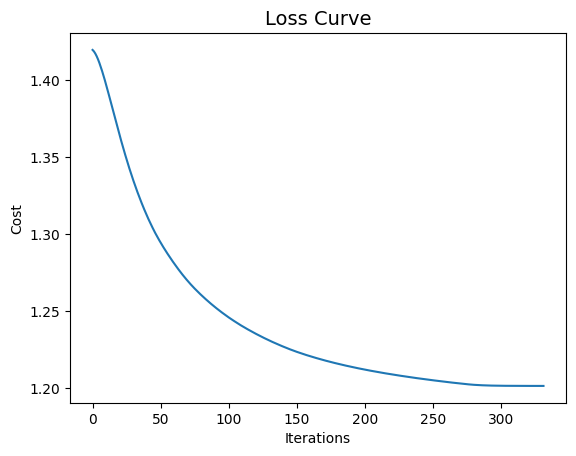

In [202]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

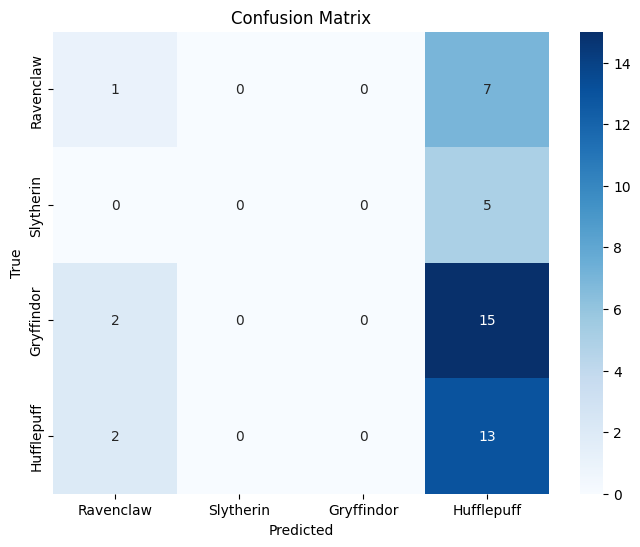

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


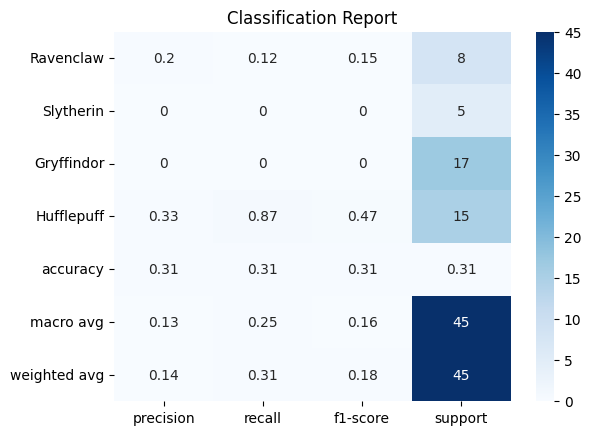

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

def plot_classification_report(y_true, y_pred, labels):
    clf_report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).T, annot=True, cmap="Blues")
    plt.title("Classification Report")
    plt.show()

def plot_f1_score(y_true, y_pred, labels):
    f1_scores = f1_score(y_true, y_pred, average=None, labels=labels)
    plt.bar(labels, f1_scores, color='blue')
    plt.xlabel('Class')
    plt.ylabel('F1 Score')
    plt.title('F1 Score per Class')
    plt.show()

class_labels = ['Ravenclaw','Slytherin','Gryffindor','Hufflepuff']
plot_confusion_matrix(y_test, y_pred, class_labels)
plot_classification_report(y_test, y_pred, class_labels)

In [204]:
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=0.05,hidden_layer_sizes=(10,15,3), random_state=42,learning_rate='adaptive',activation='relu',max_iter=200)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


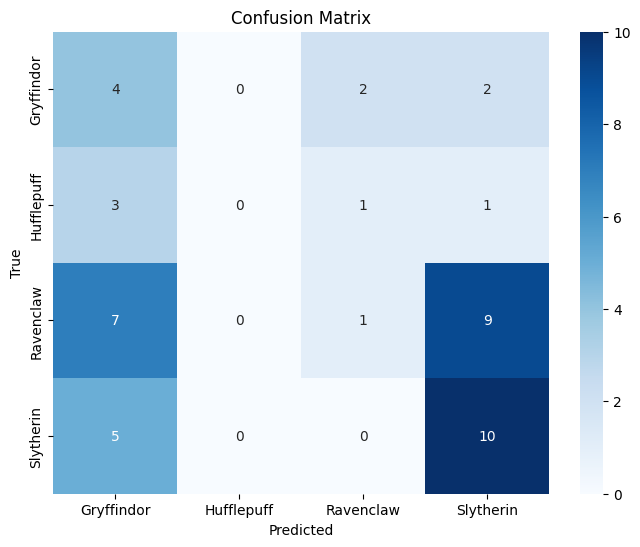

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


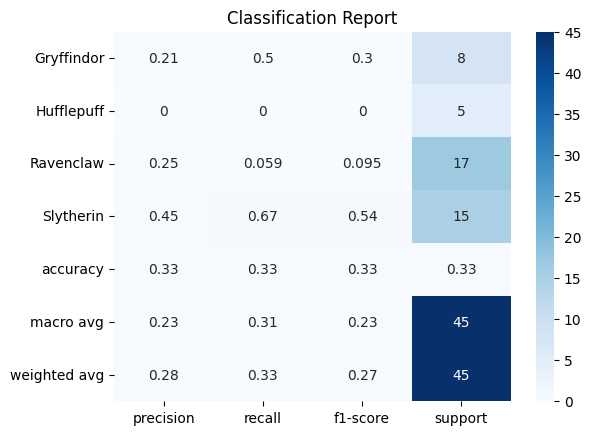

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

def plot_classification_report(y_true, y_pred, labels):
    clf_report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).T, annot=True, cmap="Blues")
    plt.title("Classification Report")
    plt.show()

def plot_f1_score(y_true, y_pred, labels):
    f1_scores = f1_score(y_true, y_pred, average=None, labels=labels)
    plt.bar(labels, f1_scores, color='blue')
    plt.xlabel('Class')
    plt.ylabel('F1 Score')
    plt.title('F1 Score per Class')
    plt.show()

class_labels = ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']
plot_confusion_matrix(y_test, y_pred, class_labels)
plot_classification_report(y_test, y_pred, class_labels)

In [206]:
household_income = float(input("Enter your household income: \n"))
num_bf = int(input("Enter number of best friends in campus:\n"))
leader_exp = input("Do you have leadership experience (Yes/No)\n")
hobby = int(input("Enter your hobbies:\n1:Cerebral\n2:Making and Tinkering\n3.Physical\n4.Creative\n5.Collecting\n6.Community Activities\n"))
inasis_input = input("Enter your inasis:\n")

# Mapping Inasis input
inasis_map = {
    'Inasis TM':'B',
    'Inasis BANK RAKYAT':'D',
    'Inasis MAS': 'A',
    'Rumah Sendiri': 'F',
    'Inasis TRADEWINDS': 'A',
    'SISIRAN': 'E',
    'Inasis PETRONAS': 'B',
    'Inasis MUAMALAT': 'C',
    'Inasis TNB': 'A',
    'Inasis BSN':'B',
    'Inasis GRANTT':'B',
    'Inasis PROTON':'A',
    'Inasis MISC': 'B',
    'Inasis SME BANK':'D',
    'Inasis YAB': 'C',
    'Inasis MAYBANK': 'A',
    'TAMAN UNIVERSITI': 'E',
    'Inasis Sime Darby':'B'
}
inasis = inasis_map.get(inasis_input, None)

if inasis is not None:
    inasis_map_int = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}
    inasis = inasis_map_int.get(inasis, None)
else:
    print("Invalid Inasis input.")
    exit()

leader_exp = 1 if leader_exp.lower() == 'yes' else 0

Xnew = np.array([household_income, num_bf, leader_exp, hobby, inasis])
Xnew = scaler.transform(Xnew.reshape(1, -1))
y_new_pred = clf.predict(Xnew)
print(f'The predicted Hogwarts House is: {y_new_pred[0]}')

Enter your household income: 
8970
Enter number of best friends in campus:
3
Do you have leadership experience (Yes/No)
yes
Enter your hobbies:
1:Cerebral
2:Making and Tinkering
3.Physical
4.Creative
5.Collecting
6.Community Activities
3
Enter your inasis:
Inasis TM
The predicted Hogwarts House is: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [122]:
X = df[['Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
#X = df[['Number of Best Friends','Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=0.0001,hidden_layer_sizes=(3,10,10,10), random_state=42,learning_rate='adaptive',activation='relu',max_iter=590)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.4667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (590) reached and the optimization hasn't converged yet.
  warnings.warn(


In [208]:
import pickle
pickle.dump(mlp,open('mlp.pkl','wb'))

In [209]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svc = SVC(probability=True, kernel='sigmoid',gamma=0.1,C=1)
ada = AdaBoostClassifier(n_estimators=500,learning_rate=1, random_state=42,estimator=svc)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3333


In [210]:
from sklearn.ensemble import GradientBoostingClassifier
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=7, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.1778


In [211]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
mlp = MLPClassifier(solver='adam', alpha=0.05,hidden_layer_sizes=(10,15,3), random_state=42,learning_rate='adaptive',activation='relu',verbose=10,max_iter=200)
bagging_clf = BaggingClassifier(base_estimator=mlp, n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Iteration 1, loss = 1.48225969
Iteration 2, loss = 1.48004809
Iteration 3, loss = 1.47808372
Iteration 4, loss = 1.47637137
Iteration 5, loss = 1.47492384
Iteration 6, loss = 1.47354886
Iteration 7, loss = 1.47218209
Iteration 8, loss = 1.47075568
Iteration 9, loss = 1.46927997
Iteration 10, loss = 1.46777127
Iteration 11, loss = 1.46625458
Iteration 12, loss = 1.46481523
Iteration 13, loss = 1.46337532
Iteration 14, loss = 1.46193784
Iteration 15, loss = 1.46050913
Iteration 16, loss = 1.45919439
Iteration 17, loss = 1.45786013
Iteration 18, loss = 1.45649744
Iteration 19, loss = 1.45512529
Iteration 20, loss = 1.45376023
Iteration 21, loss = 1.45240539
Iteration 22, loss = 1.45105312
Iteration 23, loss = 1.44971893
Iteration 24, loss = 1.44839670
Iteration 25, loss = 1.44708204
Iteration 26, loss = 1.44577368
Iteration 27, loss = 1.44448824
Iteration 28, loss = 1.44321625
Iteration 29, loss = 1.44196400
Iteration 30, loss = 1.44071798
Iteration 31, loss = 1.43947033
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 113, loss = 1.33266640
Iteration 114, loss = 1.33118019
Iteration 115, loss = 1.32969159
Iteration 116, loss = 1.32819965
Iteration 117, loss = 1.32670034
Iteration 118, loss = 1.32519303
Iteration 119, loss = 1.32368861
Iteration 120, loss = 1.32221092
Iteration 121, loss = 1.32074987
Iteration 122, loss = 1.31928596
Iteration 123, loss = 1.31782460
Iteration 124, loss = 1.31636076
Iteration 125, loss = 1.31489982
Iteration 126, loss = 1.31343673
Iteration 127, loss = 1.31197299
Iteration 128, loss = 1.31051640
Iteration 129, loss = 1.30907009
Iteration 130, loss = 1.30762267
Iteration 131, loss = 1.30616830
Iteration 132, loss = 1.30471481
Iteration 133, loss = 1.30325961
Iteration 134, loss = 1.30180848
Iteration 135, loss = 1.30036110
Iteration 136, loss = 1.29891167
Iteration 137, loss = 1.29745714
Iteration 138, loss = 1.29599920
Iteration 139, loss = 1.29454773
Iteration 140, loss = 1.29308819
Iteration 141, loss = 1.29162428
Iteration 142, loss = 1.29016080
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 1.63856028
Iteration 33, loss = 1.63347271
Iteration 34, loss = 1.62838451
Iteration 35, loss = 1.62330618
Iteration 36, loss = 1.61819410
Iteration 37, loss = 1.61305312
Iteration 38, loss = 1.60789044
Iteration 39, loss = 1.60269173
Iteration 40, loss = 1.59748659
Iteration 41, loss = 1.59228335
Iteration 42, loss = 1.58700592
Iteration 43, loss = 1.58164554
Iteration 44, loss = 1.57621788
Iteration 45, loss = 1.57075109
Iteration 46, loss = 1.56526392
Iteration 47, loss = 1.55976417
Iteration 48, loss = 1.55425450
Iteration 49, loss = 1.54873457
Iteration 50, loss = 1.54319675
Iteration 51, loss = 1.53764274
Iteration 52, loss = 1.53207388
Iteration 53, loss = 1.52649375
Iteration 54, loss = 1.52091651
Iteration 55, loss = 1.51535426
Iteration 56, loss = 1.50979622
Iteration 57, loss = 1.50424527
Iteration 58, loss = 1.49872548
Iteration 59, loss = 1.49322370
Iteration 60, loss = 1.48773905
Iteration 61, loss = 1.48228568
Iteration 62, loss = 1.47685051
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, loss = 1.39440732
Iteration 53, loss = 1.39361905
Iteration 54, loss = 1.39282375
Iteration 55, loss = 1.39202759
Iteration 56, loss = 1.39122929
Iteration 57, loss = 1.39043156
Iteration 58, loss = 1.38962663
Iteration 59, loss = 1.38882539
Iteration 60, loss = 1.38800891
Iteration 61, loss = 1.38717759
Iteration 62, loss = 1.38634632
Iteration 63, loss = 1.38550949
Iteration 64, loss = 1.38466490
Iteration 65, loss = 1.38380883
Iteration 66, loss = 1.38295336
Iteration 67, loss = 1.38208886
Iteration 68, loss = 1.38121638
Iteration 69, loss = 1.38033177
Iteration 70, loss = 1.37943456
Iteration 71, loss = 1.37853474
Iteration 72, loss = 1.37763967
Iteration 73, loss = 1.37674922
Iteration 74, loss = 1.37585118
Iteration 75, loss = 1.37494509
Iteration 76, loss = 1.37403205
Iteration 77, loss = 1.37311854
Iteration 78, loss = 1.37220055
Iteration 79, loss = 1.37127669
Iteration 80, loss = 1.37034638
Iteration 81, loss = 1.36941310
Iteration 82, loss = 1.36847843
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 76, loss = 1.50988771
Iteration 77, loss = 1.50882438
Iteration 78, loss = 1.50774420
Iteration 79, loss = 1.50665452
Iteration 80, loss = 1.50556869
Iteration 81, loss = 1.50446902
Iteration 82, loss = 1.50335378
Iteration 83, loss = 1.50225499
Iteration 84, loss = 1.50118782
Iteration 85, loss = 1.50010806
Iteration 86, loss = 1.49902831
Iteration 87, loss = 1.49794724
Iteration 88, loss = 1.49687143
Iteration 89, loss = 1.49578428
Iteration 90, loss = 1.49468113
Iteration 91, loss = 1.49358224
Iteration 92, loss = 1.49247685
Iteration 93, loss = 1.49136464
Iteration 94, loss = 1.49024565
Iteration 95, loss = 1.48911915
Iteration 96, loss = 1.48798742
Iteration 97, loss = 1.48684926
Iteration 98, loss = 1.48570918
Iteration 99, loss = 1.48456296
Iteration 100, loss = 1.48341014
Iteration 101, loss = 1.48225216
Iteration 102, loss = 1.48108153
Iteration 103, loss = 1.47991076
Iteration 104, loss = 1.47873653
Iteration 105, loss = 1.47756550
Iteration 106, loss = 1.47639494
I

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 111, loss = 1.06865762
Iteration 112, loss = 1.06778629
Iteration 113, loss = 1.06694914
Iteration 114, loss = 1.06613327
Iteration 115, loss = 1.06532020
Iteration 116, loss = 1.06448851
Iteration 117, loss = 1.06367519
Iteration 118, loss = 1.06286650
Iteration 119, loss = 1.06211966
Iteration 120, loss = 1.06138866
Iteration 121, loss = 1.06067157
Iteration 122, loss = 1.05996417
Iteration 123, loss = 1.05926483
Iteration 124, loss = 1.05855333
Iteration 125, loss = 1.05782450
Iteration 126, loss = 1.05709026
Iteration 127, loss = 1.05635051
Iteration 128, loss = 1.05562255
Iteration 129, loss = 1.05487997
Iteration 130, loss = 1.05411854
Iteration 131, loss = 1.05335982
Iteration 132, loss = 1.05259854
Iteration 133, loss = 1.05184422
Iteration 134, loss = 1.05109220
Iteration 135, loss = 1.05033386
Iteration 136, loss = 1.04959334
Iteration 137, loss = 1.04888974
Iteration 138, loss = 1.04825788
Iteration 139, loss = 1.04760180
Iteration 140, loss = 1.04692779
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 106, loss = 1.29201973
Iteration 107, loss = 1.29162225
Iteration 108, loss = 1.29121927
Iteration 109, loss = 1.29082348
Iteration 110, loss = 1.29042491
Iteration 111, loss = 1.29002377
Iteration 112, loss = 1.28962002
Iteration 113, loss = 1.28921474
Iteration 114, loss = 1.28880890
Iteration 115, loss = 1.28839816
Iteration 116, loss = 1.28798649
Iteration 117, loss = 1.28757435
Iteration 118, loss = 1.28716174
Iteration 119, loss = 1.28674910
Iteration 120, loss = 1.28632988
Iteration 121, loss = 1.28591335
Iteration 122, loss = 1.28549557
Iteration 123, loss = 1.28507714
Iteration 124, loss = 1.28466301
Iteration 125, loss = 1.28425957
Iteration 126, loss = 1.28386204
Iteration 127, loss = 1.28345193
Iteration 128, loss = 1.28303594
Iteration 129, loss = 1.28263921
Iteration 130, loss = 1.28225081
Iteration 131, loss = 1.28185033
Iteration 132, loss = 1.28143528
Iteration 133, loss = 1.28102042
Iteration 134, loss = 1.28060331
Iteration 135, loss = 1.28016299
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 106, loss = 1.24109237
Iteration 107, loss = 1.24018964
Iteration 108, loss = 1.23929728
Iteration 109, loss = 1.23842977
Iteration 110, loss = 1.23756074
Iteration 111, loss = 1.23669078
Iteration 112, loss = 1.23581894
Iteration 113, loss = 1.23494687
Iteration 114, loss = 1.23408123
Iteration 115, loss = 1.23321325
Iteration 116, loss = 1.23234851
Iteration 117, loss = 1.23148851
Iteration 118, loss = 1.23062726
Iteration 119, loss = 1.22976345
Iteration 120, loss = 1.22890418
Iteration 121, loss = 1.22807811
Iteration 122, loss = 1.22724979
Iteration 123, loss = 1.22642229
Iteration 124, loss = 1.22558815
Iteration 125, loss = 1.22476502
Iteration 126, loss = 1.22395252
Iteration 127, loss = 1.22313931
Iteration 128, loss = 1.22232966
Iteration 129, loss = 1.22151705
Iteration 130, loss = 1.22070682
Iteration 131, loss = 1.21990544
Iteration 132, loss = 1.21910390
Iteration 133, loss = 1.21830937
Iteration 134, loss = 1.21752486
Iteration 135, loss = 1.21674018
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 17, loss = 1.82549884
Iteration 18, loss = 1.81412737
Iteration 19, loss = 1.80297976
Iteration 20, loss = 1.79198756
Iteration 21, loss = 1.78114994
Iteration 22, loss = 1.77050864
Iteration 23, loss = 1.76000819
Iteration 24, loss = 1.74968074
Iteration 25, loss = 1.73948286
Iteration 26, loss = 1.72942024
Iteration 27, loss = 1.71935119
Iteration 28, loss = 1.70946314
Iteration 29, loss = 1.69981017
Iteration 30, loss = 1.69036746
Iteration 31, loss = 1.68108932
Iteration 32, loss = 1.67199195
Iteration 33, loss = 1.66309799
Iteration 34, loss = 1.65436997
Iteration 35, loss = 1.64576460
Iteration 36, loss = 1.63733926
Iteration 37, loss = 1.62907603
Iteration 38, loss = 1.62087049
Iteration 39, loss = 1.61275043
Iteration 40, loss = 1.60503436
Iteration 41, loss = 1.59758641
Iteration 42, loss = 1.59036070
Iteration 43, loss = 1.58322222
Iteration 44, loss = 1.57624470
Iteration 45, loss = 1.56958474
Iteration 46, loss = 1.56339285
Iteration 47, loss = 1.55774767
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 22, loss = 1.56154865
Iteration 23, loss = 1.55769708
Iteration 24, loss = 1.55384353
Iteration 25, loss = 1.54999102
Iteration 26, loss = 1.54614652
Iteration 27, loss = 1.54229687
Iteration 28, loss = 1.53844771
Iteration 29, loss = 1.53460574
Iteration 30, loss = 1.53076541
Iteration 31, loss = 1.52692793
Iteration 32, loss = 1.52309765
Iteration 33, loss = 1.51926861
Iteration 34, loss = 1.51543973
Iteration 35, loss = 1.51160948
Iteration 36, loss = 1.50778377
Iteration 37, loss = 1.50396016
Iteration 38, loss = 1.50015606
Iteration 39, loss = 1.49635677
Iteration 40, loss = 1.49256036
Iteration 41, loss = 1.48877315
Iteration 42, loss = 1.48498852
Iteration 43, loss = 1.48120921
Iteration 44, loss = 1.47744002
Iteration 45, loss = 1.47367860
Iteration 46, loss = 1.46992456
Iteration 47, loss = 1.46617886
Iteration 48, loss = 1.46244185
Iteration 49, loss = 1.45871186
Iteration 50, loss = 1.45499301
Iteration 51, loss = 1.45127999
Iteration 52, loss = 1.44757384
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 43, loss = 1.24669241
Iteration 44, loss = 1.24606572
Iteration 45, loss = 1.24543634
Iteration 46, loss = 1.24478265
Iteration 47, loss = 1.24412506
Iteration 48, loss = 1.24344827
Iteration 49, loss = 1.24275711
Iteration 50, loss = 1.24210611
Iteration 51, loss = 1.24150199
Iteration 52, loss = 1.24096874
Iteration 53, loss = 1.24048856
Iteration 54, loss = 1.24000418
Iteration 55, loss = 1.23953167
Iteration 56, loss = 1.23905277
Iteration 57, loss = 1.23856360
Iteration 58, loss = 1.23806401
Iteration 59, loss = 1.23755909
Iteration 60, loss = 1.23704603
Iteration 61, loss = 1.23652636
Iteration 62, loss = 1.23600684
Iteration 63, loss = 1.23550111
Iteration 64, loss = 1.23499298
Iteration 65, loss = 1.23451649
Iteration 66, loss = 1.23405317
Iteration 67, loss = 1.23358884
Iteration 68, loss = 1.23312624
Iteration 69, loss = 1.23268031
Iteration 70, loss = 1.23224275
Iteration 71, loss = 1.23182314
Iteration 72, loss = 1.23140191
Iteration 73, loss = 1.23098501
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [212]:
import numpy as np
from scipy.sparse import random
import numpy as np
from scipy.sparse import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import warnings

X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
data_array = X.to_numpy()
total_elements = data_array.size
zero_elements = np.count_nonzero(data_array == 0)
sparsity = zero_elements / total_elements
print("Sparsity:", sparsity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifiers = [
    SVC(kernel="rbf"),
    LogisticRegression(),
    KMeans(
        n_clusters=2,
        init="k-means++",
        max_iter=100,
        random_state=42,
        algorithm="full",
    ),
    KNeighborsClassifier(n_neighbors=5),
    MLPClassifier(
        hidden_layer_sizes=(100, 50),
        max_iter=1000,
        alpha=0.01,
        solver="sgd",
        verbose=0,
        random_state=21,
        tol=0.000000001,
    ),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
]

df = pd.DataFrame(columns=["Classifier", "F1 Score"])
warnings.filterwarnings(
    "ignore", category=ConvergenceWarning
)

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred,average='weighted')
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                {"Classifier": [type(clf).__name__], "F1 Score": [f1]}
            ),
        ],
        ignore_index=True,
    )
df = df.sort_values(by="F1 Score", ascending=True)
df

Sparsity: 0.36


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Classifier  F1 Score
2                  KMeans  0.027350
6  RandomForestClassifier  0.111043
0                     SVC  0.209340
4           MLPClassifier  0.211765
5  DecisionTreeClassifier  0.223760
1      LogisticRegression  0.246615
3    KNeighborsClassifier  0.250578

In [213]:
from sklearn.metrics import f1_score, accuracy_score
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  # You can change 'weighted' to 'micro' or 'macro' if needed
    accuracy = accuracy_score(y_test, y_pred)
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                {"Classifier": [type(clf).__name__], "F1 Score": [f1], "Accuracy": [accuracy]}
            ),
        ],
        ignore_index=True,
    )

df = df.sort_values(by="F1 Score", ascending=True)
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Classifier  F1 Score  Accuracy
0                   KMeans  0.027350       NaN
9                   KMeans  0.027350  0.044444
1   RandomForestClassifier  0.111043       NaN
13  RandomForestClassifier  0.148547  0.177778
12  DecisionTreeClassifier  0.189276  0.222222
2                      SVC  0.209340       NaN
7                      SVC  0.209340  0.311111
3            MLPClassifier  0.211765       NaN
11           MLPClassifier  0.211765  0.333333
4   DecisionTreeClassifier  0.223760       NaN
5       LogisticRegression  0.246615       NaN
8       LogisticRegression  0.246615  0.311111
6     KNeighborsClassifier  0.250578       NaN
10    KNeighborsClassifier  0.250578  0.266667

In [214]:
#X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
X = df[['Number of Best Friends','Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=0.0001,hidden_layer_sizes=(3,10,10,10), random_state=42,learning_rate='adaptive',activation='relu',max_iter=400)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

KeyError: "None of [Index(['Number of Best Friends', 'Leadership Experience', 'Hobbies', 'Inasis'], dtype='object')] are in the [columns]"

In [215]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score with best parameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('Classification Report:')
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Model accuracy score with best parameters: 0.1778
Classification Report:
              precision    recall  f1-score   support

           1       0.16      0.38      0.22         8
           2       0.00      0.00      0.00         5
           3       0.17      0.06      0.09        17
           4       0.20      0.27      0.23        15

    accuracy                           0.18        45
   macro avg       0.13      0.18      0.13        45
weighted avg       0.16      0.18      0.15        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AttributeError: 'MLPClassifier' object has no attribute 'classes_'

<Figure size 1000x700 with 0 Axes>

In [ ]:
import pickle
pickle.dump(mlp,open('adam_nn.pkl','wb'))

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
param_grid = {
    'solver': ['lbfgs', 'adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],
    'hidden_layer_sizes': [(5,10,10,10), (10,10,10), (50,50,50), (100,)],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'max_iter': [200, 300, 400]
}

# Create the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

# Evaluate the model
print('Model accuracy score with best parameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Best parameters found:  {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}
Model accuracy score with best parameters: 0.2667


In [ ]:
%cd /

In [ ]:
%30